In [1]:
library(repr)
options(repr.plot.width=18, repr.plot.height=9)

# 可变斜率

## 模拟总体

In [79]:
a       <-  3.5  # average morning wait time
b       <- -1    # average difference afternoon wait time
sigma_a <-  1    # std dev in intercepts
sigma_b <-  0.5  # std dev in slopes
rho     <- -.7   # correlation between intercepts and slopes

# the next three lines of code simply combine the terms, above
mu     <- c(a, b)
cov_ab <- sigma_a * sigma_b * rho
sigma  <- matrix(c(sigma_a^2, cov_ab, 
                   cov_ab, sigma_b^2), ncol = 2)

library(tidyverse)

sigmas <- c(sigma_a, sigma_b)          # standard deviations
rho    <- matrix(c(1, rho,             # correlation matrix
                   rho, 1), nrow = 2)

# now matrix multiply to get covariance matrix
sigma <- diag(sigmas) %*% rho %*% diag(sigmas)

# how many cafes would you like?
n_cafes <- 20

set.seed(13)  # used to replicate example
vary_effects <- 
  MASS::mvrnorm(n_cafes, mu, sigma) %>% 
  data.frame() %>% 
  set_names("a_cafe", "b_cafe")

head(vary_effects)

a_cafe   b_cafe    
1 2.917639 -0.8649154
2 3.552770 -1.6814372
3 1.694390 -0.4168858
4 3.442417 -0.6011724
5 2.289988 -0.7461953
6 3.069283 -0.8839639

In [80]:
library(dutchmasters)
dutchmasters$pearl_earring

red(lips)              skin      blue(scarf1)      blue(scarf2) 
        "#A65141"         "#E7CDC2"         "#80A0C7"         "#394165" 
     white(colar)       gold(dress)      gold(dress2) black(background) 
        "#FCF9F0"         "#B1934A"         "#DCA258"         "#100F14" 
     grey(scarf3)    yellow(scarf4)                   
        "#8B9DAF"         "#EEDA9D"         "#E8DCCF"

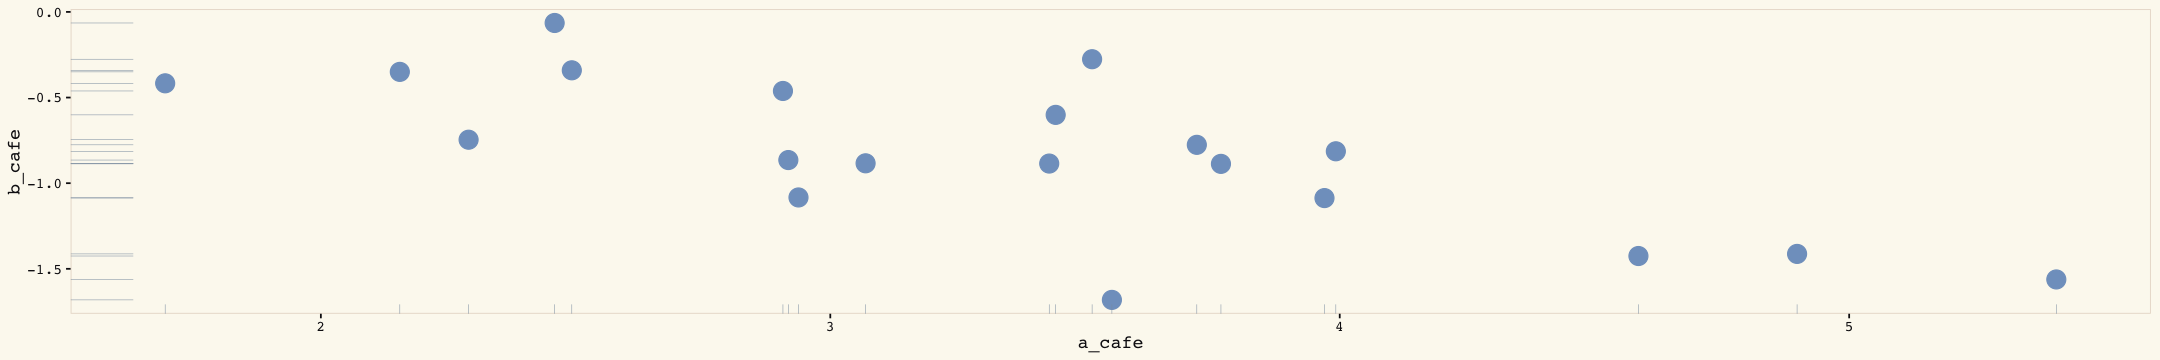

In [81]:
theme_pearl_earring <-
  theme(text       = element_text(color = "#100F14", family = "Courier"),
        strip.text = element_text(color = "#100F14", family = "Courier"),
        axis.text  = element_text(color = "#100F14"),
        axis.ticks = element_line(color = "#100F14"),
        line       = element_line(color = "#100F14"),
        plot.background   = element_rect(fill = "#FCF9F0", color = "transparent"),
        panel.background  = element_rect(fill = "#FCF9F0", color = "#E8DCCF"),
        strip.background  = element_rect(fill = "#FCF9F0", color = "transparent"),
        panel.grid = element_blank(),
        legend.background = element_rect(fill = "#FCF9F0", color = "transparent"),
        legend.key        = element_rect(fill = "#FCF9F0", color = "transparent"),
        axis.line = element_blank())

vary_effects %>% 
  ggplot(aes(x = a_cafe, y = b_cafe)) +
  geom_point(color = "#80A0C7", size = 5) +
  geom_rug(color = "#8B9DAF", size = 1/7) +
  theme_pearl_earring

## 模拟观测

In [19]:
n_visits <- 10    # 模拟10次访问，5 次早晨，5 次下午
sigma    <-  0.5  # 咖啡馆内等待时间标准差

set.seed(13)  # used to replicate example
d <-
  vary_effects %>% 
  mutate(cafe      = 1:n_cafes) %>% 
  expand(nesting(cafe, a_cafe, b_cafe), visit = 1:n_visits) %>% 
  mutate(afternoon = rep(0:1, times = n() / 2)) %>% 
  mutate(mu        = a_cafe + b_cafe * afternoon) %>% 
  mutate(wait      = rnorm(n = n(), mean = mu, sd = sigma))

head(d)

cafe a_cafe   b_cafe     visit afternoon mu       wait    
1 1    2.917639 -0.8649154 1     0         2.917639 3.194802
2 1    2.917639 -0.8649154 2     1         2.052723 1.912587
3 1    2.917639 -0.8649154 3     0         2.917639 3.805220
4 1    2.917639 -0.8649154 4     1         2.052723 2.146383
5 1    2.917639 -0.8649154 5     0         2.917639 3.488902
6 1    2.917639 -0.8649154 6     1         2.052723 2.260486

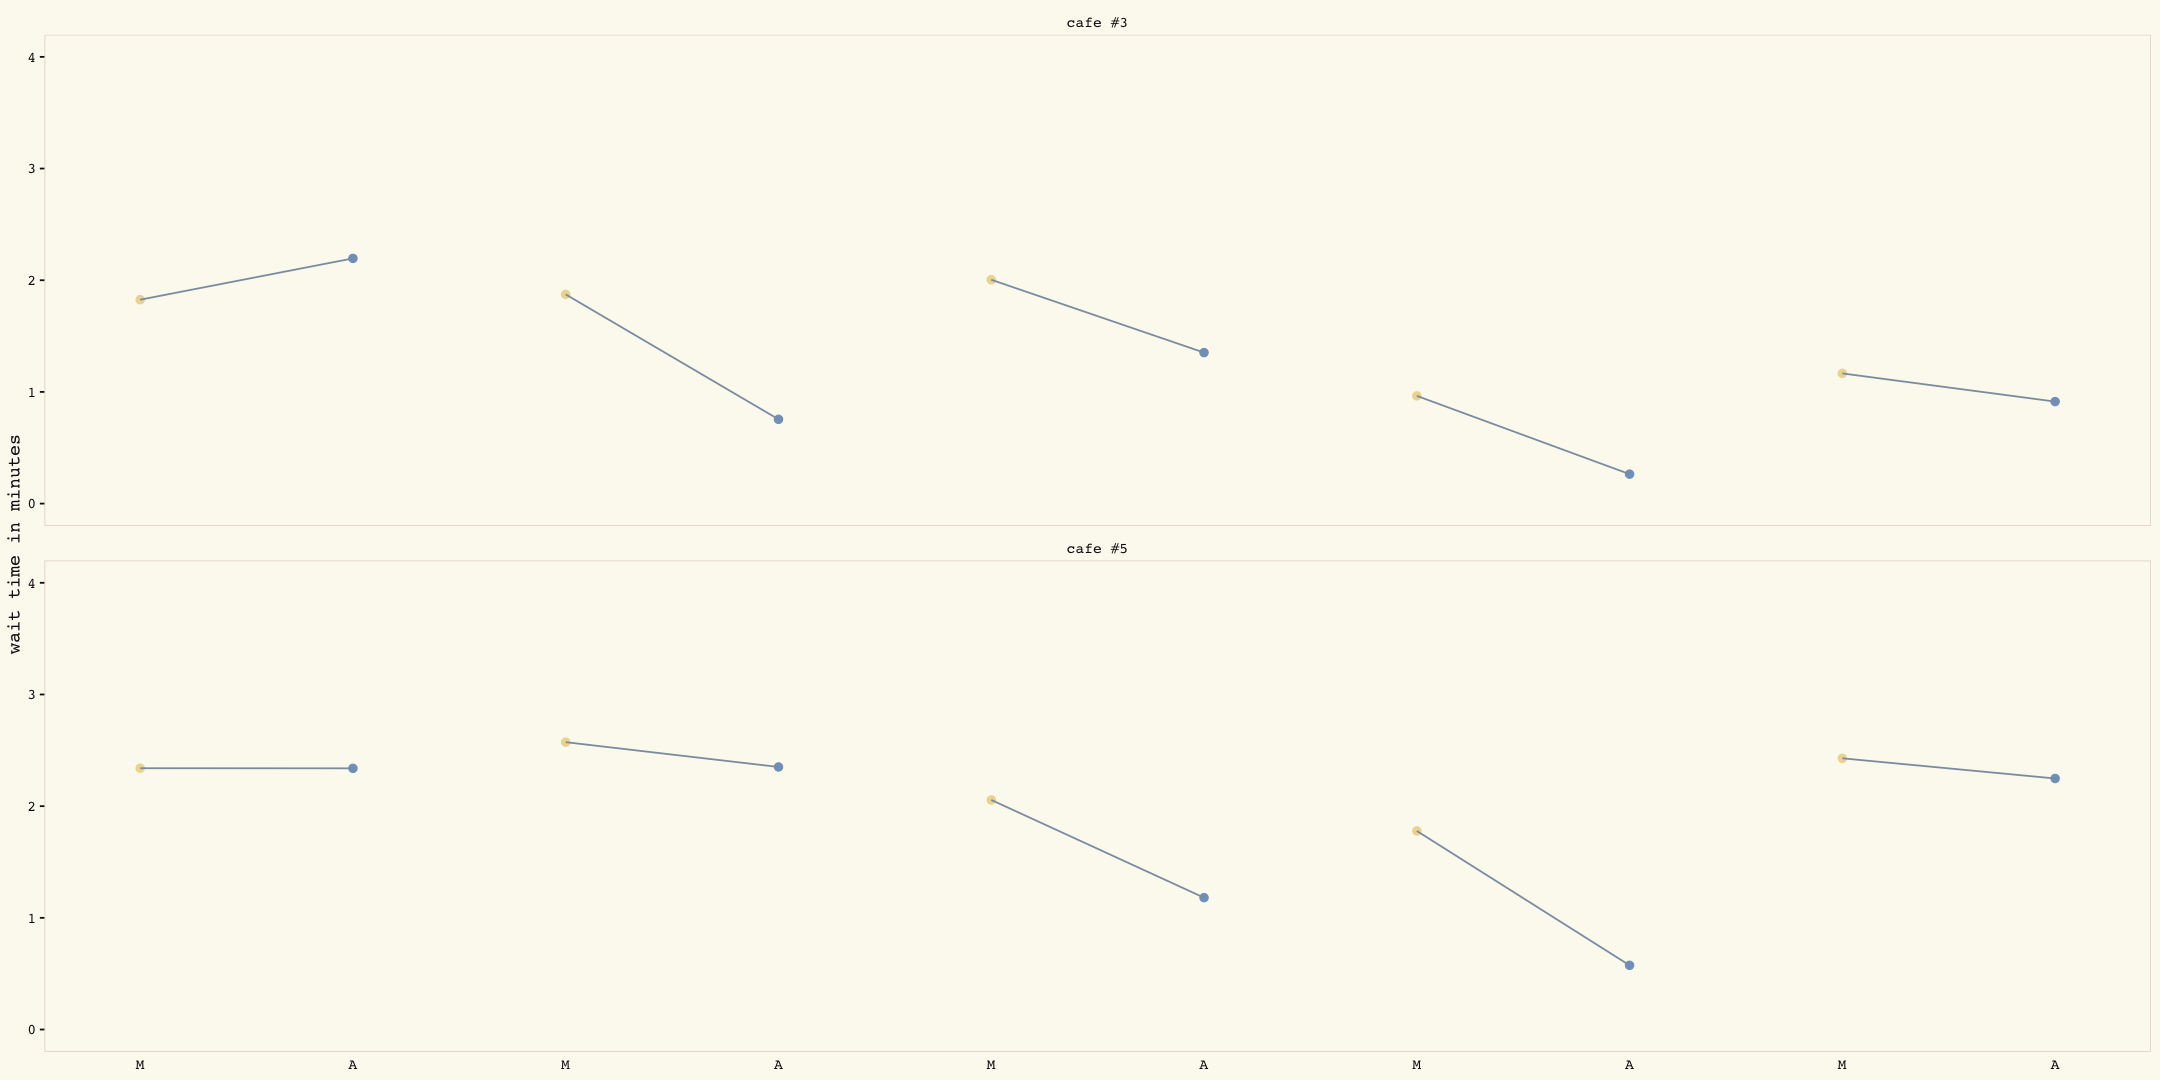

In [55]:
d %>%
  mutate(afternoon = ifelse(afternoon == 0, "M", "A"),
         day       = rep(rep(1:5, each = 2), times = n_cafes)) %>%
  filter(cafe %in% c(3, 5)) %>%
  mutate(cafe = ifelse(cafe == 3, "cafe #3", "cafe #5")) %>%
  
  ggplot(aes(x = visit, y = wait, group = day)) +
  geom_point(aes(color = afternoon), size = 2) +
  geom_line(color = "#8B9DAF") +
  scale_color_manual(values = c("#80A0C7", "#EEDA9D")) +
  scale_x_continuous(NULL, breaks = 1:10,
                     labels = rep(c("M", "A"), times = 5)) +
  scale_y_continuous(limits = c(0, 4)) +
  ylab("wait time in minutes") +
  theme_pearl_earring +
  theme(legend.position = "none",
        axis.ticks.x    = element_blank()) +
  facet_wrap(~cafe, ncol = 1)

## 可变斜率
\begin{aligned} \text { wait }_{i} & \sim \operatorname{Normal}\left(\mu_{i}, \sigma\right) \\ \mu_{i} &=\alpha_{\text {cafe } i}+\beta_{\text {cafe }_{i}} \text { afternoon }_{i} \\\left[\begin{array}{c}\alpha_{\text {cafe }} \\ \beta_{\text {cafe }}\end{array}\right] & \sim \operatorname{MVNormal}\left(\left[\begin{array}{c}\alpha \\ \beta\end{array}\right], \mathbf{S}\right) \\ \mathbf{S} &=\left(\begin{array}{cc}\sigma_{\alpha} & 0 \\ 0 & \sigma_{\beta}\end{array}\right) \mathbf{R}\left(\begin{array}{cc}\sigma_{\alpha} & 0 \\ 0 & \sigma_{\beta}\end{array}\right) \\ \alpha & \sim \operatorname{Normal}(0,10) \\ \beta & \sim \operatorname{Normal}(0,10) \\ \sigma & \sim \operatorname{HalfCauchy}(0,1) \\ \sigma_{\alpha} & \sim \operatorname{HalfCauchy}(0,1) \\ \sigma_{\beta} & \sim \operatorname{HalfCauchy}(0,1) \\ \mathbf{R} & \sim \operatorname{LKJcorr}(2) \end{aligned}

In [66]:
library(rethinking)

n_sim <- 1e5

set.seed(13)
r_1 <- 
  rlkjcorr(n_sim, K = 2, eta = 1) %>%
  as_tibble()

set.seed(13)
r_2 <- 
  rlkjcorr(n_sim, K = 2, eta = 2) %>%
  as_tibble()

set.seed(13)
r_4 <- 
  rlkjcorr(n_sim, K = 2, eta = 4) %>%
  as_tibble()

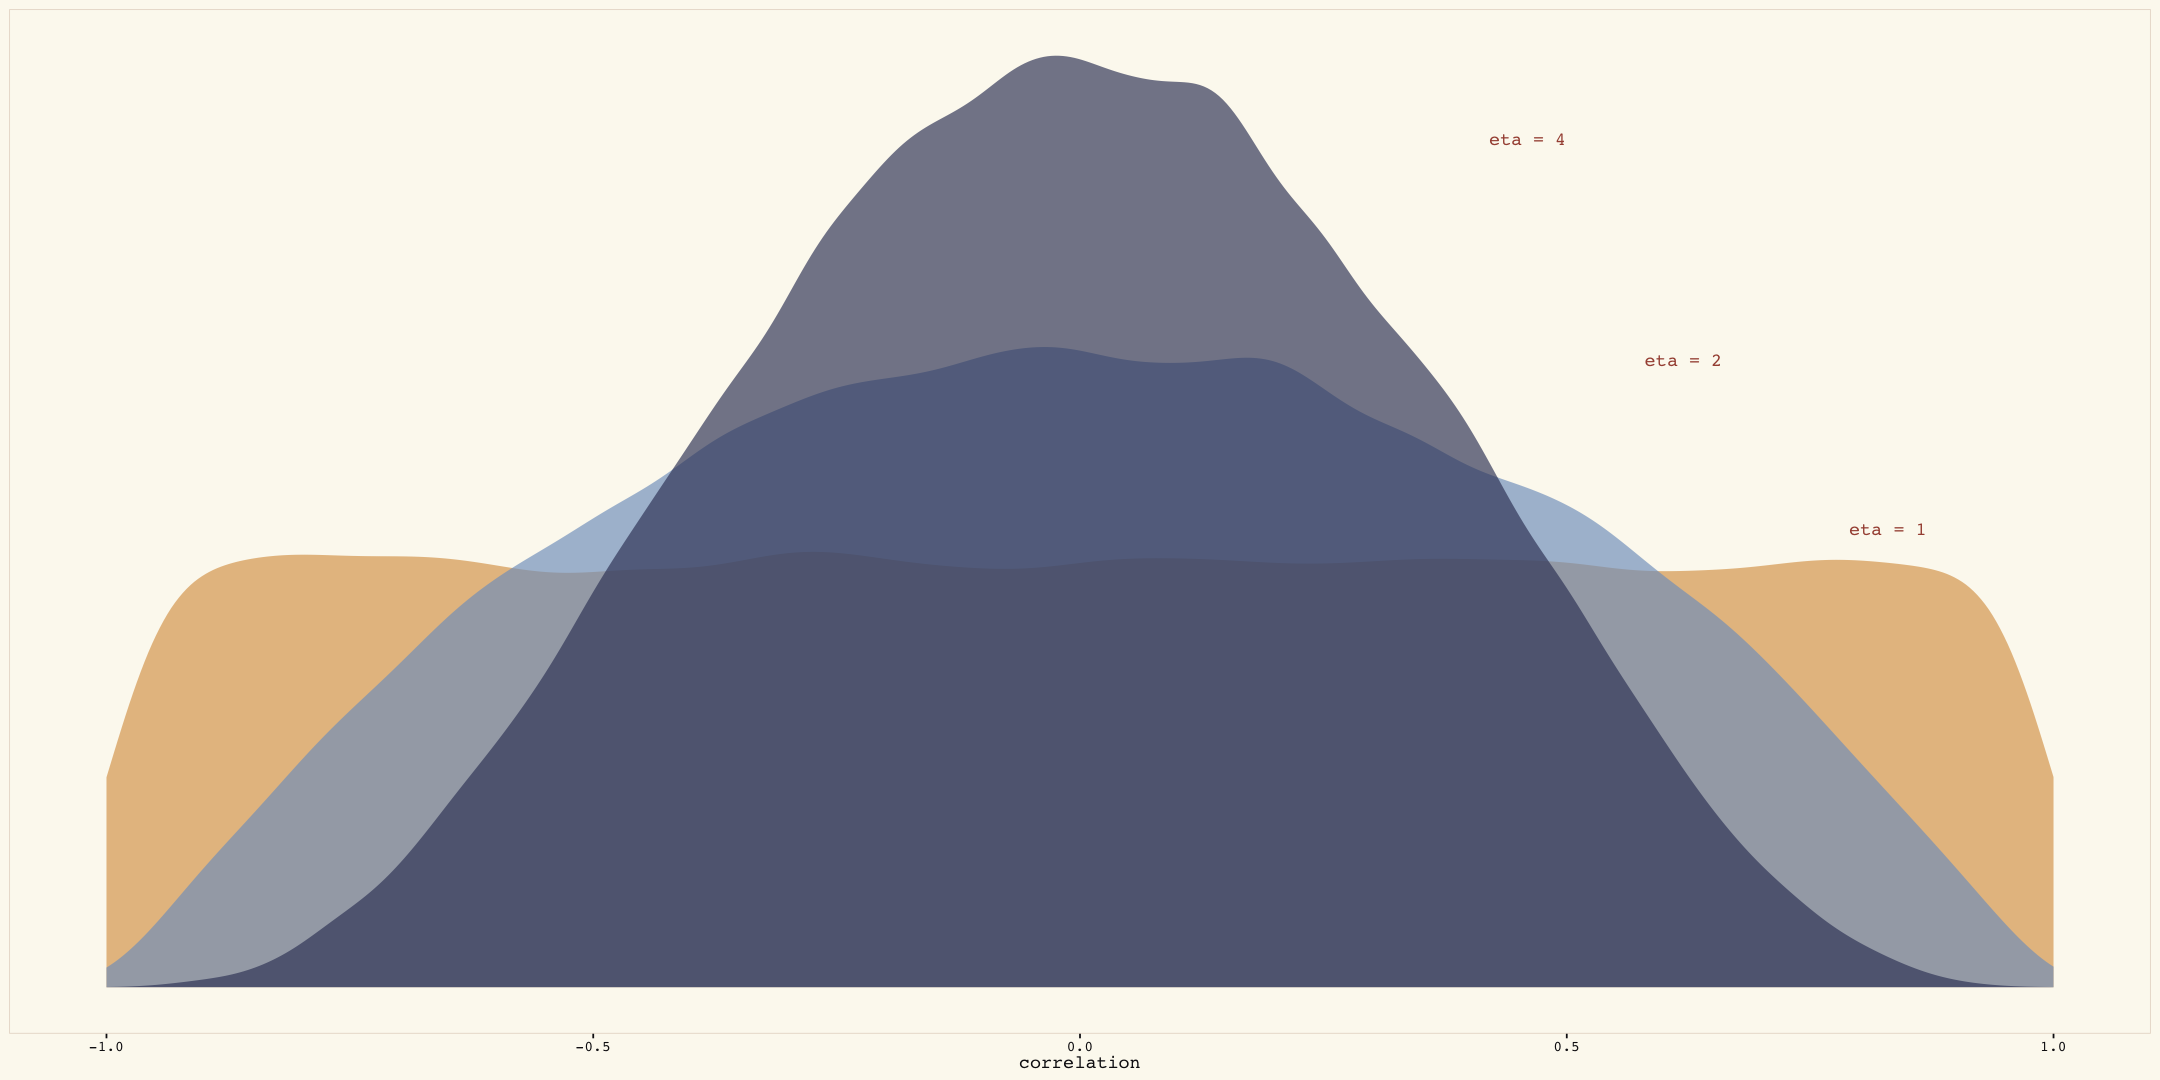

In [64]:
ggplot(data = r_1, aes(x = V2)) +
  geom_density(color = "transparent", fill = "#DCA258", alpha = 2/3) +
  geom_density(data = r_2,
               color = "transparent", fill = "#80A0C7", alpha = 2/3) +
  geom_density(data = r_4,
               color = "transparent", fill = "#394165", alpha = 2/3) +
  geom_text(data = tibble(x     = c(.83, .62, .46),
                          y     = c(.54, .74, 1),
                          label = c("eta = 1", "eta = 2", "eta = 4")),
            aes(x = x, y = y, label = label),
            color = "#A65141", family = "Courier") +
  scale_y_continuous(NULL, breaks = NULL) +
  xlab("correlation") +
  theme_pearl_earring

 `(1 + afternoon | cafe)` 语法表明希望 `brm()` 通过`1 (i.e., the intercept)`拟合随机效应且与`afternoon`斜率相关。如果想拟合正交的模型，则语法为 `(1 + afternoon || cafe)`

Compiling the C++ model

recompiling to avoid crashing R session

Start sampling



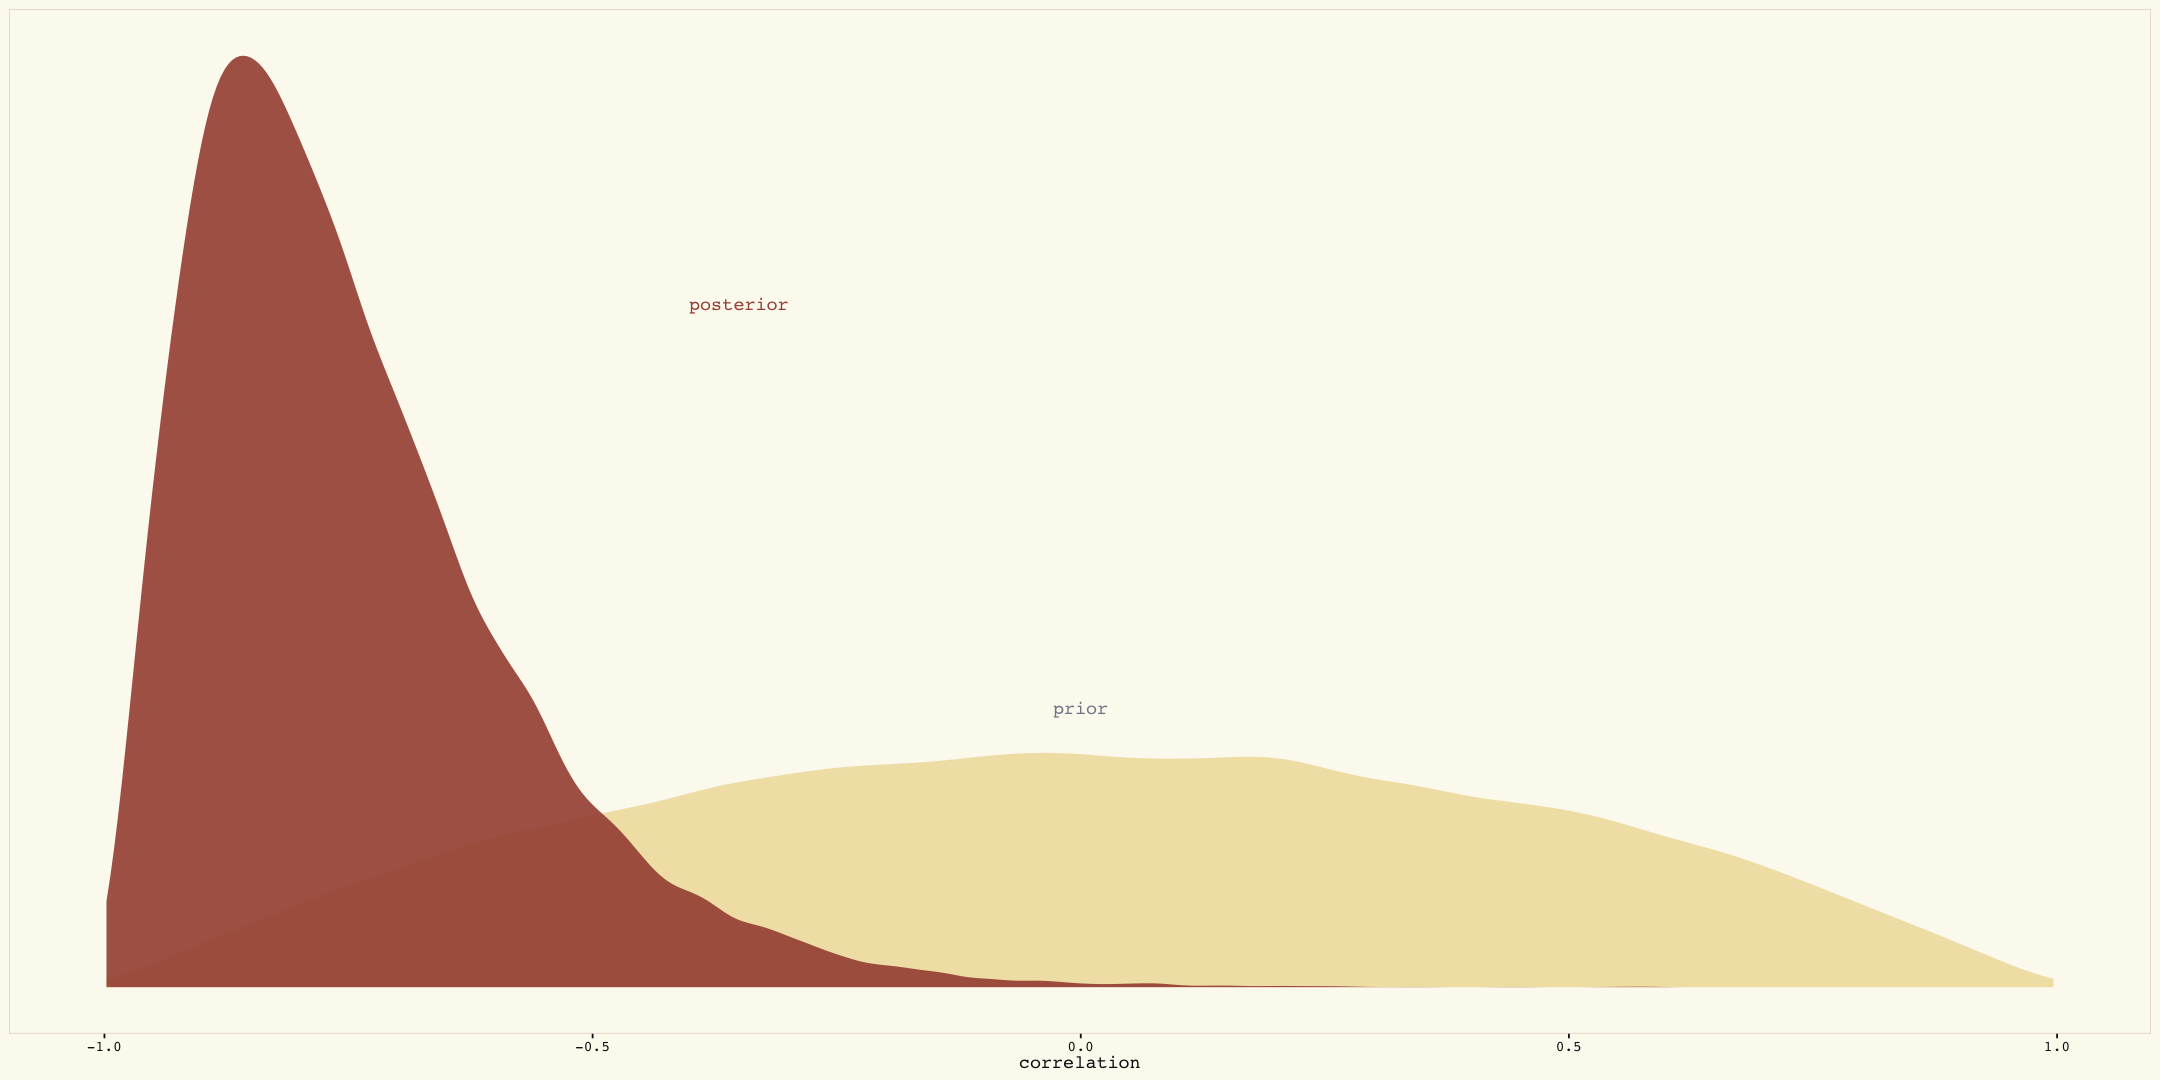

In [67]:
detach(package:rethinking, unload = T)
library(brms)

b13.1 <- brm(data = d, family = gaussian,
      wait ~ 1 + afternoon + (1 + afternoon | cafe),      # 固定因子为 afternoon (自变量)，固定截距 + 随机斜率(因子为`cafe`)
      prior = c(prior(normal(0, 10), class = Intercept),
                prior(normal(0, 10), class = b),
                prior(cauchy(0, 2), class = sd),
                prior(cauchy(0, 2), class = sigma),
                prior(lkj(2), class = cor)),
      iter = 10000, warmup = 2000, chains = 4, cores = 4,
      seed = 13)

post <- posterior_samples(b13.1)

post %>%
  ggplot(aes(x = cor_cafe__Intercept__afternoon)) +
  geom_density(data = r_2, aes(x = V2),
               color = "transparent", fill = "#EEDA9D", alpha = 3/4) +
  geom_density(color = "transparent", fill = "#A65141", alpha = 9/10) +
  annotate("text", label = "posterior", 
           x = -0.35, y = 2.2, 
           color = "#A65141", family = "Courier") +
  annotate("text", label = "prior", 
           x = 0, y = 0.9, 
           color = "#394165", alpha = 2/3, family = "Courier") +
  scale_y_continuous(NULL, breaks = NULL) +
  xlab("correlation") +
  theme_pearl_earring

system("osascript -e \'display notification \"程序\" with title \"跑完了\"\'")
beepr::beep(sound = 4)

通过将可变效应的后验均值与原始的、未整合的估计值相比较，以描绘多维收缩。通过`brms`，我们可以用`coef()`得到`cafe`的截距和`afternoon`的斜率，它返回一个三维`list`

In [29]:
print(coef(b13.1))

$cafe
, , Intercept

   Estimate Est.Error     Q2.5    Q97.5
1  3.264483 0.2013587 2.869148 3.661195
2  3.167932 0.2066829 2.767815 3.581335
3  1.615314 0.2072257 1.203932 2.019942
4  3.332756 0.1995395 2.938717 3.719512
5  2.295904 0.2025882 1.894053 2.688942
6  3.146675 0.1981759 2.760267 3.535157
7  2.649207 0.2058906 2.237578 3.049565
8  3.640125 0.2008093 3.248209 4.035131
9  4.117755 0.2009716 3.727559 4.517851
10 2.323041 0.2057801 1.912653 2.722143
11 4.443820 0.2010386 4.049686 4.833238
12 2.835320 0.2000340 2.446568 3.231027
13 4.653251 0.2047916 4.251984 5.056491
14 5.530153 0.2175965 5.102675 5.962588
15 3.562928 0.2006937 3.170928 3.959175
16 3.484200 0.2010569 3.087101 3.874538
17 2.338661 0.2015266 1.945077 2.732090
18 3.958445 0.1998737 3.572447 4.353174
19 3.495904 0.2004460 3.100956 3.882678
20 3.170833 0.2011756 2.775823 3.566127

, , afternoon

     Estimate Est.Error       Q2.5        Q97.5
1  -0.9145208 0.2105391 -1.3541875 -0.523771714
2  -1.0504232 0.2434332 -1.

In [62]:
# 部分聚合
partially_pooled_params <-
  # 针对`Intercept`和`afternoon`选择20个咖啡馆的后验均值(即 Estimate)
  coef(b13.1)$cafe[ , 1, 1:2] %>% 
  as_tibble() %>%               # convert the two vectors to a tibble
  rename(Slope = afternoon) %>%
  mutate(cafe = 1:nrow(.)) %>%  # add the `cafe` index
  select(cafe, everything())    # simply moving `cafe` to the leftmost position

# 通过数据计算未聚合的估计
un_pooled_params <-
  d %>%
  # 按 早晨-下午 的顺序计算每个咖啡馆的等待时间均值
  group_by(afternoon, cafe) %>%
  summarise(mean = mean(wait)) %>%
  ungroup() %>%  # ungrouping allows us to alter afternoon, one of the grouping variables
  mutate(afternoon = ifelse(afternoon == 0, "Intercept", "Slope")) %>%
  spread(key = afternoon, value = mean) %>%  # use `spread()` just as in the previous block
  mutate(Slope = Slope - Intercept)          # finally, here's our slope!

# 整合部分聚合与未聚合的数据
params <-
  # `bind_rows()` will stack the second tibble below the first
  bind_rows(partially_pooled_params, un_pooled_params) %>%
  # 编码pool情况
  mutate(pooled = rep(c("partially", "not"), each = nrow(.)/2)) 

# here's a glimpse at what we've been working for
params %>%
  slice(c(1:5, 36:40))

cafe Intercept Slope      pooled   
1   1   3.264483  -0.9145208 partially
2   2   3.167932  -1.0504232 partially
3   3   1.615314  -0.4271277 partially
4   4   3.332756  -0.7345144 partially
5   5   2.295904  -0.5463230 partially
6  16   3.377600  -0.4646278 not      
7  17   2.286685  -0.5312969 not      
8  18   4.006784  -1.0673128 not      
9  19   3.394852  -0.4839719 not      
10 20   3.115171  -0.6169351 not

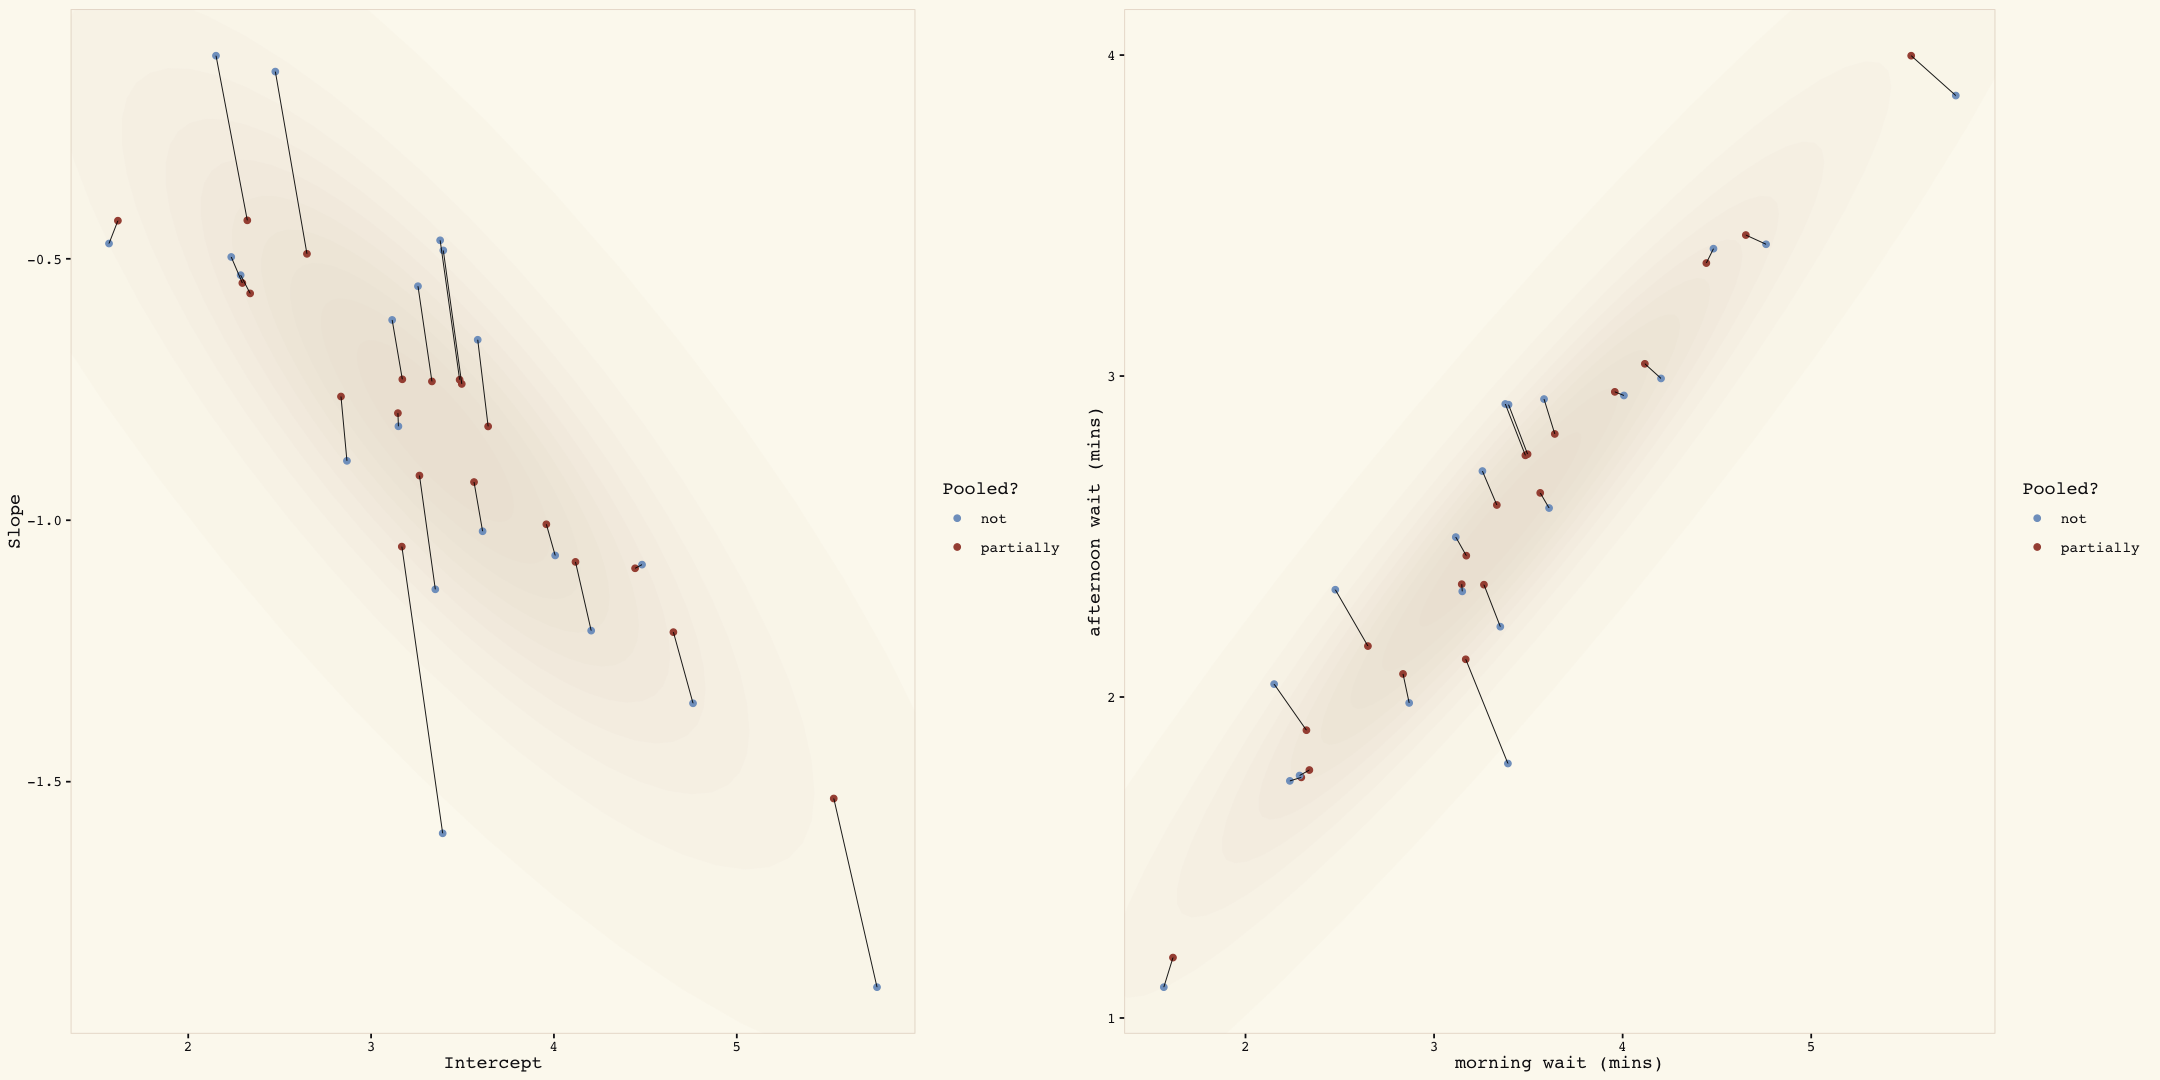

In [58]:
p1 = ggplot(data = params, aes(x = Intercept, y = Slope)) +
  stat_ellipse(geom = "polygon", type = "norm", level = 1/10, size = 0, alpha = 1/20, fill = "#E7CDC2") +
  stat_ellipse(geom = "polygon", type = "norm", level = 2/10, size = 0, alpha = 1/20, fill = "#E7CDC2") +
  stat_ellipse(geom = "polygon", type = "norm", level = 3/10, size = 0, alpha = 1/20, fill = "#E7CDC2") +
  stat_ellipse(geom = "polygon", type = "norm", level = 4/10, size = 0, alpha = 1/20, fill = "#E7CDC2") +
  stat_ellipse(geom = "polygon", type = "norm", level = 5/10, size = 0, alpha = 1/20, fill = "#E7CDC2") +
  stat_ellipse(geom = "polygon", type = "norm", level = 6/10, size = 0, alpha = 1/20, fill = "#E7CDC2") +
  stat_ellipse(geom = "polygon", type = "norm", level = 7/10, size = 0, alpha = 1/20, fill = "#E7CDC2") +
  stat_ellipse(geom = "polygon", type = "norm", level = 8/10, size = 0, alpha = 1/20, fill = "#E7CDC2") +
  stat_ellipse(geom = "polygon", type = "norm", level = 9/10, size = 0, alpha = 1/20, fill = "#E7CDC2") +
  stat_ellipse(geom = "polygon", type = "norm", level = .99,  size = 0, alpha = 1/20, fill = "#E7CDC2") +
  geom_point(aes(group = cafe, color = pooled)) +
  geom_line(aes(group = cafe), size = 1/4) +
  scale_color_manual("Pooled?",
                     values = c("#80A0C7", "#A65141")) +
  coord_cartesian(xlim = range(params$Intercept),
                  ylim = range(params$Slope)) +
  theme_pearl_earring

# retrieve the partially-pooled estimates with `coef()`
partially_pooled_estimates <-
  coef(b13.1)$cafe[ , 1, 1:2] %>%
  # convert the two vectors to a tibble
  as_tibble() %>%
  # the Intercept is the wait time for morning (i.e., `afternoon == 0`)
  rename(morning = Intercept) %>%
  # `afternoon` wait time is the `morning` wait time plus the afternoon slope
  mutate(afternoon = morning + afternoon,
         cafe      = 1:n()) %>%  # add the `cafe` index
  select(cafe, everything()) 

# compute unpooled estimates directly from data
un_pooled_estimates <-
  d %>%
  # as above, with these two lines, we compute each cafe's mean wait value by time of day
  group_by(afternoon, cafe) %>% 
  summarise(mean = mean(wait)) %>%
  # ungrouping allows us to alter the grouping variable, afternoon
  ungroup() %>% 
  mutate(afternoon = ifelse(afternoon == 0, "morning", "afternoon")) %>%
  # this seperates out the values into morning and afternoon columns
  spread(key = afternoon, value = mean)

estimates <-
  bind_rows(partially_pooled_estimates, un_pooled_estimates) %>%
  mutate(pooled = rep(c("partially", "not"), each = n() / 2))

p2 = ggplot(data = estimates, aes(x = morning, y = afternoon)) +
  # nesting `stat_ellipse()` within `mapply()` is a less redundant way to produce the 
  # ten-layered semitransparent ellipses we did with ten lines of `stat_ellipse()` 
  # functions in the previous plot
  mapply(function(level) {
    stat_ellipse(geom  = "polygon", type = "norm",
                 size  = 0, alpha = 1/20, fill = "#E7CDC2",
                 level = level)
    }, 
    # Enter the levels here
    level = c(seq(from = 1/10, to = 9/10, by = 1/10), .99)) +
  geom_point(aes(group = cafe, color = pooled)) +
  geom_line(aes(group = cafe), size = 1/4) +
  scale_color_manual("Pooled?",
                     values = c("#80A0C7", "#A65141")) +
  coord_cartesian(xlim = range(estimates$morning),
                  ylim = range(estimates$afternoon)) +
  labs(x = "morning wait (mins)",
       y = "afternoon wait (mins)") +
  theme_pearl_earring

cowplot::plot_grid(p1, p2, ncol = 2)

# 录取决定与性别歧视

In [70]:
library(rethinking)
data(UCBadmit)
d <- UCBadmit
detach(package:rethinking, unload = T)
library(brms)
rm(UCBadmit)

d <- 
  d %>%
  mutate(male    = ifelse(applicant.gender == "male", 1, 0),
         dept_id = rep(1:6, each = 2))
head(d)

rethinking (Version 1.95)


Attaching package: ‘rethinking’


The following objects are masked from ‘package:brms’:

    LOO, stancode, WAIC


The following object is masked from ‘package:purrr’:

    map


The following object is masked from ‘package:stats’:

    rstudent




dept applicant.gender admit reject applications male dept_id
1 A    male             512   313    825          1    1      
2 A    female            89    19    108          0    1      
3 B    male             353   207    560          1    2      
4 B    female            17     8     25          0    2      
5 C    male             120   205    325          1    3      
6 C    female           202   391    593          0    3

## 可变截距
\begin{aligned} \operatorname{admit}_i & \sim \operatorname{Binomial}\left(n_i, p_i\right) \\ \operatorname{logit}\left(p_i\right) &=\alpha_{\mathrm{dept}_{\mathrm{id}} i}+\beta \mathrm{male}_i \\ \alpha_{\mathrm{dept}_{\mathrm{id}}} & \sim \operatorname{Normal}(\alpha, \sigma) \\ \alpha & \sim \operatorname{Normal}(0,10) \\ \beta & \sim \operatorname{Normal}(0,1) \\ \sigma & \sim \operatorname{HalfCauchy}(0,2) \end{aligned}

In [71]:
b13.2 <- 
  brm(data = d, family = binomial,
      admit | trials(applications) ~ 1 + male + (1 | dept_id),    #群体水平是可变的，性别假设为固定，只存在学院截距的随机效应
      prior = c(prior(normal(0, 10), class = Intercept),
                prior(normal(0, 1), class = b),
                prior(cauchy(0, 2), class = sd)),
      iter = 5000, warmup = 1000, chains = 4, cores = 4,
      seed = 13,
      control = list(adapt_delta = 0.99))

b13.2$fit

Compiling the C++ model

Start sampling



Inference for Stan model: 4366f95d50e83541509caa319e56f393.
4 chains, each with iter=5000; warmup=1000; thin=1; 
post-warmup draws per chain=4000, total post-warmup draws=16000.

                         mean se_mean   sd   2.5%    25%    50%    75%  97.5%
b_Intercept             -0.58    0.01 0.65  -1.90  -0.96  -0.58  -0.21   0.76
b_male                  -0.09    0.00 0.08  -0.25  -0.15  -0.09  -0.04   0.06
sd_dept_id__Intercept    1.47    0.01 0.55   0.78   1.10   1.35   1.70   2.84
r_dept_id[1,Intercept]   1.26    0.01 0.65  -0.09   0.88   1.25   1.63   2.59
r_dept_id[2,Intercept]   1.21    0.01 0.65  -0.12   0.84   1.21   1.58   2.56
r_dept_id[3,Intercept]   0.00    0.01 0.65  -1.35  -0.38   0.00   0.38   1.33
r_dept_id[4,Intercept]  -0.04    0.01 0.65  -1.39  -0.41  -0.04   0.34   1.30
r_dept_id[5,Intercept]  -0.48    0.01 0.65  -1.82  -0.84  -0.48  -0.10   0.86
r_dept_id[6,Intercept]  -2.03    0.01 0.66  -3.40  -2.41  -2.02  -1.64  -0.70
lp__                   -61.84    0.04 2.5

注意到组水平参数与教材中的参数不一致。虽然我们的`r_dept_id[1,Intercept]`的后均值为1.26，但文中的`a_dept[1]`的数值是0.67。这是因为`brms`包中的随机效应是以非中心化度量的方式呈现的。反之，`rethinking`包则是以中心化度量后的随机效应来表示

In [74]:
summary(b13.2)

 Family: binomial 
  Links: mu = logit 
Formula: admit | trials(applications) ~ 1 + male + (1 | dept_id) 
   Data: d (Number of observations: 12) 
Samples: 4 chains, each with iter = 5000; warmup = 1000; thin = 1;
         total post-warmup samples = 16000

Group-Level Effects: 
~dept_id (Number of levels: 6) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     1.47      0.55     0.78     2.84 1.00     2602     3766

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    -0.58      0.65    -1.90     0.76 1.00     2324     2990
male         -0.09      0.08    -0.25     0.06 1.00     6181     6117

Samples were drawn using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

In [72]:
print(coef(b13.2))   # 获取中心化后的效应

$dept_id
, , Intercept

    Estimate  Est.Error       Q2.5      Q97.5
1  0.6741334 0.09912826  0.4806949  0.8720166
2  0.6284909 0.11530509  0.4050274  0.8568417
3 -0.5830200 0.07474055 -0.7300523 -0.4382198
4 -0.6168245 0.08556501 -0.7848615 -0.4474063
5 -1.0583857 0.09927807 -1.2545123 -0.8656363
6 -2.6083779 0.15456739 -2.9207634 -2.3137626

, , male

    Estimate  Est.Error       Q2.5      Q97.5
1 -0.0939372 0.08024323 -0.2528126 0.06187942
2 -0.0939372 0.08024323 -0.2528126 0.06187942
3 -0.0939372 0.08024323 -0.2528126 0.06187942
4 -0.0939372 0.08024323 -0.2528126 0.06187942
5 -0.0939372 0.08024323 -0.2528126 0.06187942
6 -0.0939372 0.08024323 -0.2528126 0.06187942




In [75]:
mean(coef(b13.2)$dept_id[ , "Estimate", "Intercept"])

[1] -0.5939973

In [76]:
coef(b13.2) %>% str()   # coef() 返回三维列表，所以切片需要设置好参数

List of 1
 $ dept_id: num [1:6, 1:4, 1:2] 0.674 0.628 -0.583 -0.617 -1.058 ...
  ..- attr(*, "dimnames")=List of 3
  .. ..$ : chr [1:6] "1" "2" "3" "4" ...
  .. ..$ : chr [1:4] "Estimate" "Est.Error" "Q2.5" "Q97.5"
  .. ..$ : chr [1:2] "Intercept" "male"


In [77]:
coef(b13.2)$dept_id[ , , "Intercept"]  # 获取随机截距，也可用 coef(b13.2)$dept_id[ , , 1]

Estimate   Est.Error  Q2.5       Q97.5     
1  0.6741334 0.09912826  0.4806949  0.8720166
2  0.6284909 0.11530509  0.4050274  0.8568417
3 -0.5830200 0.07474055 -0.7300523 -0.4382198
4 -0.6168245 0.08556501 -0.7848615 -0.4474063
5 -1.0583857 0.09927807 -1.2545123 -0.8656363
6 -2.6083779 0.15456739 -2.9207634 -2.3137626

In [78]:
rbind(coef(b13.2)$dept_id[, , "Intercept"],
      fixef(b13.2),
      VarCorr(b13.2)$dept_id$sd)

Estimate   Est.Error  Q2.5       Q97.5      
1          0.6741334 0.09912826  0.4806949  0.87201662
2          0.6284909 0.11530509  0.4050274  0.85684172
3         -0.5830200 0.07474055 -0.7300523 -0.43821982
4         -0.6168245 0.08556501 -0.7848615 -0.44740627
5         -1.0583857 0.09927807 -1.2545123 -0.86563631
6         -2.6083779 0.15456739 -2.9207634 -2.31376258
Intercept -0.5811229 0.64579317 -1.9034076  0.76228072
male      -0.0939372 0.08024323 -0.2528126  0.06187942
Intercept  1.4717060 0.55432909  0.7765034  2.84370251

In [79]:
rbind(coef(b13.2)$dept_id[, , "Intercept"],
      fixef(b13.2),
      VarCorr(b13.2)$dept_id$sd) %>% 
  as_tibble() %>% 
  mutate(parameter = c(paste("Intercept [", 1:6, "]", sep = ""), 
                       "Intercept", "male", "sigma")) %>% 
  select(parameter, everything()) %>% 
  mutate_if(is_double, round, digits = 2)

parameter     Estimate Est.Error Q2.5  Q97.5
1 Intercept [1]  0.67    0.10       0.48  0.87
2 Intercept [2]  0.63    0.12       0.41  0.86
3 Intercept [3] -0.58    0.07      -0.73 -0.44
4 Intercept [4] -0.62    0.09      -0.78 -0.45
5 Intercept [5] -1.06    0.10      -1.25 -0.87
6 Intercept [6] -2.61    0.15      -2.92 -2.31
7 Intercept     -0.58    0.65      -1.90  0.76
8 male          -0.09    0.08      -0.25  0.06
9 sigma          1.47    0.55       0.78  2.84

In [80]:
library(broom)

tidy(b13.2) %>%
  mutate_if(is.numeric, round, digits = 2)  # this line just rounds the output

term                   estimate std.error lower  upper 
1  b_Intercept             -0.58   0.65       -1.61   0.44
2  b_male                  -0.09   0.08       -0.23   0.04
3  sd_dept_id__Intercept    1.47   0.55        0.84   2.48
4  r_dept_id[1,Intercept]   1.26   0.65        0.23   2.29
5  r_dept_id[2,Intercept]   1.21   0.65        0.19   2.25
6  r_dept_id[3,Intercept]   0.00   0.65       -1.02   1.04
7  r_dept_id[4,Intercept]  -0.04   0.65       -1.07   1.01
8  r_dept_id[5,Intercept]  -0.48   0.65       -1.52   0.54
9  r_dept_id[6,Intercept]  -2.03   0.66       -3.07  -0.99
10 lp__                   -61.84   2.53      -66.48 -58.36

## 性别可变效应
\begin{aligned} \operatorname{admit}_i & \sim \operatorname{Binomial}\left(n_i, p_i\right) \\ \operatorname{logit}\left(p_i\right) &=\alpha_{\mathrm{dept}_{\mathrm{id}} i}+\beta_{\mathrm{dept}_{\mathrm{id}}} \mathrm{male}_i \\\left[\begin{array}{c}\alpha_{\mathrm{dept}_{\mathrm{id}}} \\ \beta_{\mathrm{dept}_{-\mathrm{id}}}\end{array}\right] & \sim \operatorname{MVNormal}\left(\left[\begin{array}{cc}\alpha \\ \beta\end{array}\right], \mathrm{S}\right) \\ \mathbf{S} &=\left(\begin{array}{cc}\sigma_\alpha & 0 \\ 0 & \sigma_\beta\end{array}\right) \mathbf{R}\left(\begin{array}{cc}\sigma_\alpha & 0 \\ 0 & \sigma_\beta\end{array}\right) \\ \alpha & \sim \operatorname{Normal}(0,10) \\ \beta & \sim \operatorname{Normal}(0,1) \\\left(\sigma_\alpha, \sigma_\beta\right) & \sim \operatorname{HalfCauchy}(0,2) \\ \mathbf{R} & \sim \operatorname{LKJcorr}(2) \end{aligned}

Compiling the C++ model

recompiling to avoid crashing R session

Start sampling



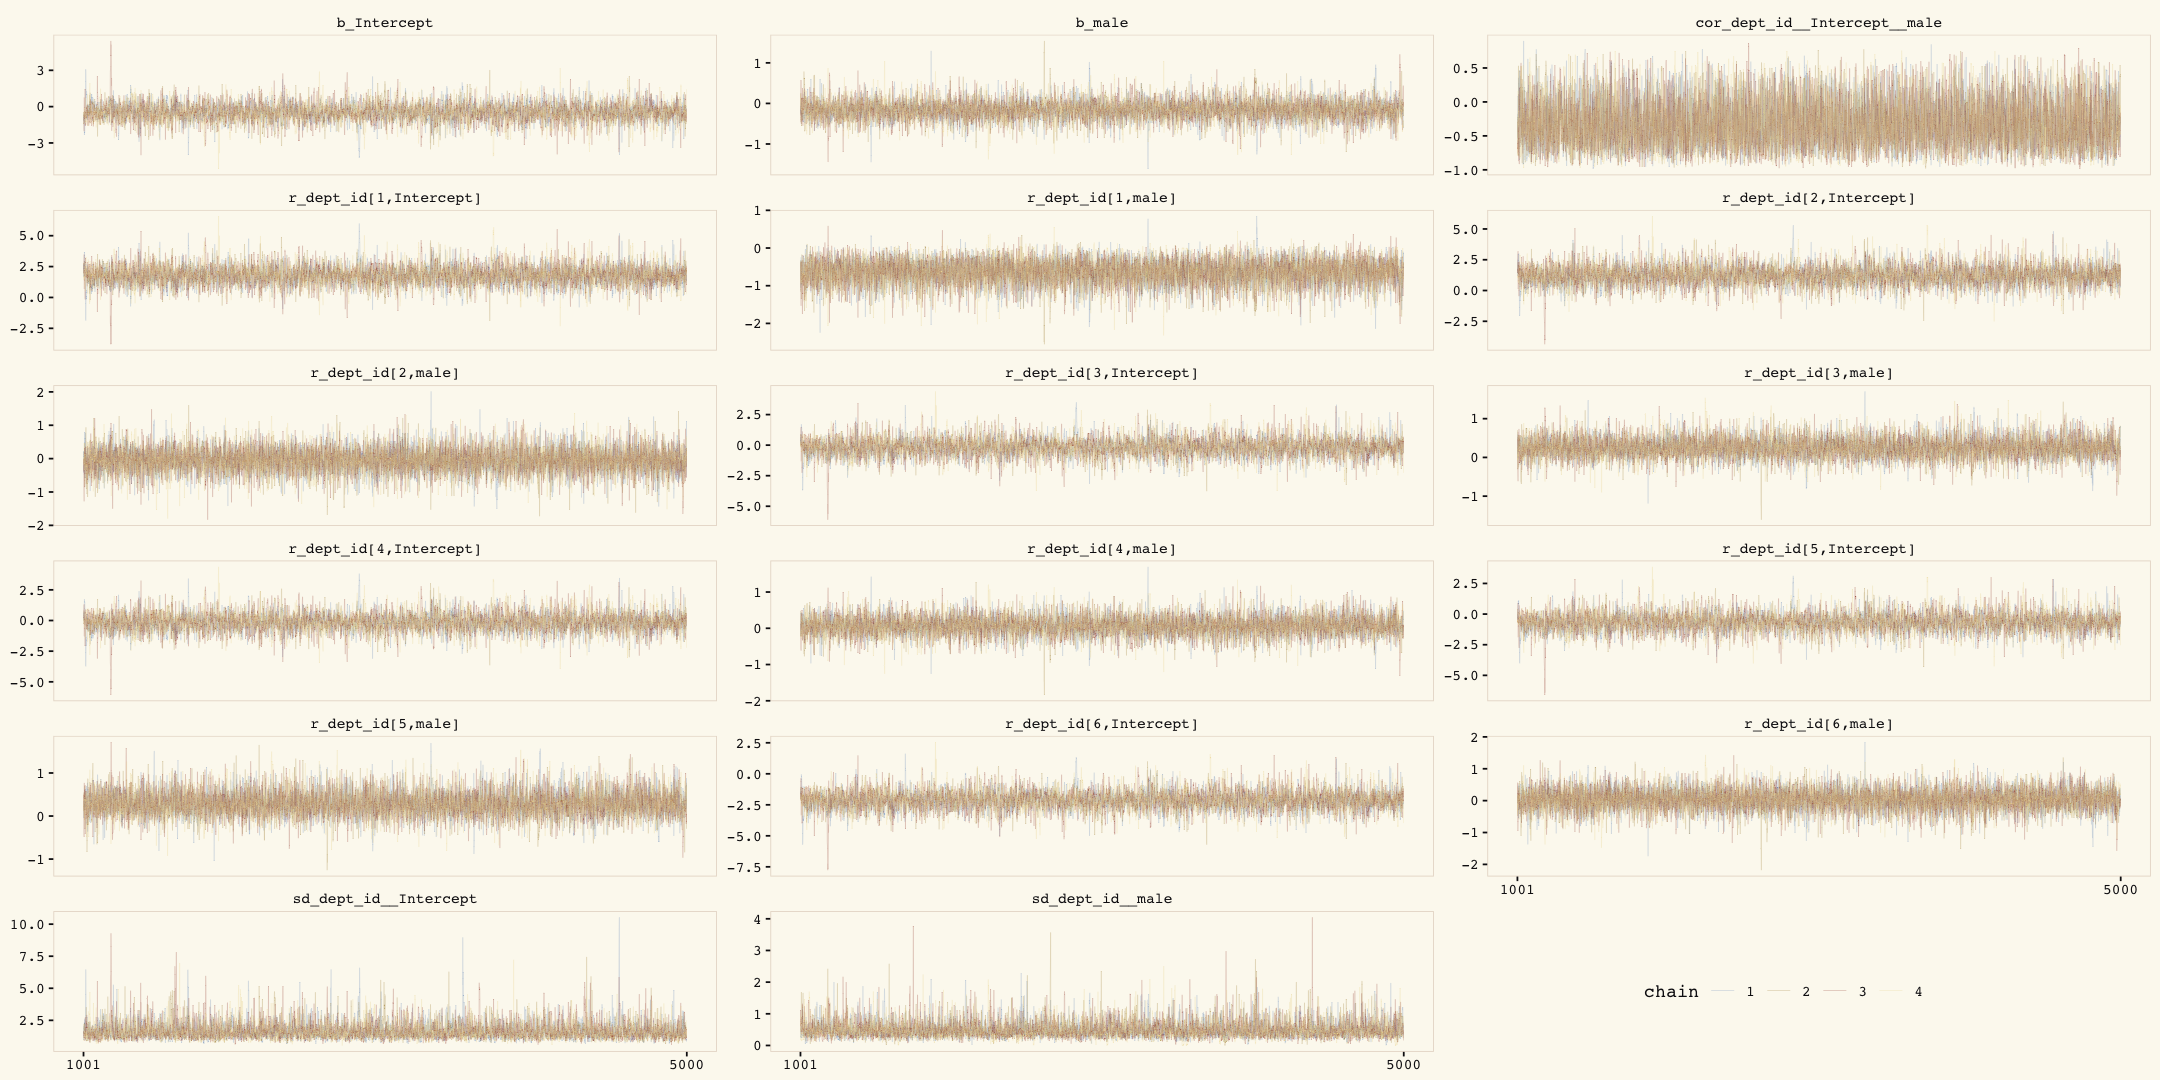

In [88]:
b13.3 <- 
  brm(data = d, family = binomial,
      admit | trials(applications) ~ 1 + male + (1 + male | dept_id),
      prior = c(prior(normal(0, 10), class = Intercept),
                prior(normal(0, 1), class = b),
                prior(cauchy(0, 2), class = sd),
                prior(lkj(2), class = cor)),
      iter = 5000, warmup = 1000, chains = 4, cores = 4,
      seed = 13,
      control = list(adapt_delta = .99,
                     max_treedepth = 12))

post <- posterior_samples(b13.3, add_chain = T)

post %>% 
  select(-lp__) %>% 
  gather(key, value, -chain, -iter) %>% 
  mutate(chain = as.character(chain)) %>% 

  ggplot(aes(x = iter, y = value, group = chain, color = chain)) +
  geom_line(size = 1/15) +
  scale_color_manual(values = c("#80A0C7", "#B1934A", "#A65141", "#EEDA9D")) +
  scale_x_continuous(NULL, breaks = c(1001, 5000)) +
  ylab(NULL) +
  theme_pearl_earring +
  theme(legend.position  = c(.825, .06),
        legend.direction = "horizontal") +
  facet_wrap(~key, ncol = 3, scales = "free_y")

system("osascript -e \'display notification \"程序\" with title \"跑完了\"\'")
beepr::beep(sound = 4)

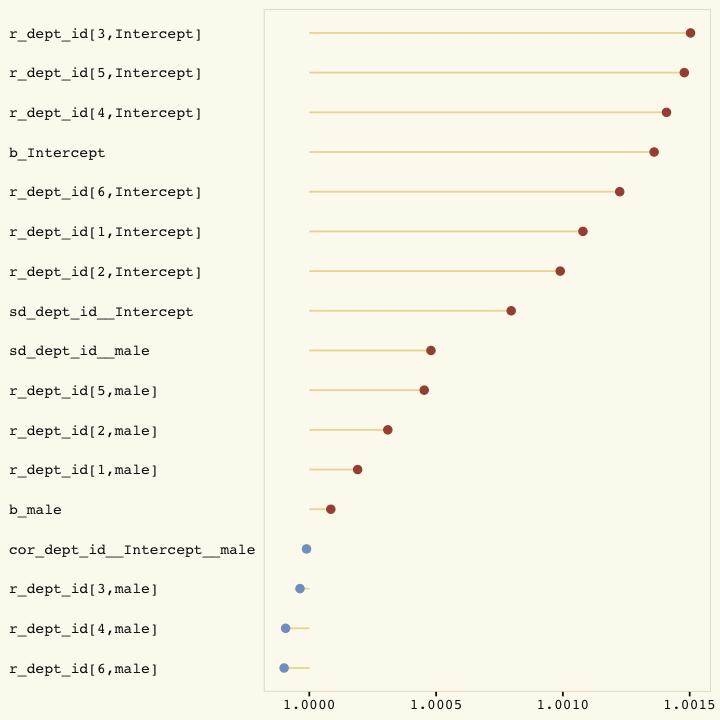

In [91]:
options(repr.plot.width=6, repr.plot.height=6)
rhat(b13.3) %>% 
  data.frame() %>% 
  rownames_to_column() %>% 
  set_names("parameter", "rhat") %>% 
  filter(parameter != "lp__") %>% 
  
  ggplot(aes(x = rhat, y = reorder(parameter, rhat))) + 
  geom_segment(aes(xend = 1, yend = parameter),
               color = "#EEDA9D") +
  geom_point(aes(color = rhat > 1), 
             size = 2) +
  scale_color_manual(values = c("#80A0C7", "#A65141")) +
  labs(x = NULL, y = NULL) +
  theme_pearl_earring +
  theme(legend.position = "none",
        axis.ticks.y    = element_blank(),
        axis.text.y     = element_text(hjust = 0))

# Rhat基本都是1

In [93]:
print(coef(b13.3))   #查看随机效应

$dept_id
, , Intercept

    Estimate  Est.Error       Q2.5      Q97.5
1  1.3017556 0.25798189  0.8006848  1.8230060
2  0.7392375 0.32747893  0.1045111  1.3989921
3 -0.6469424 0.08557464 -0.8148181 -0.4805054
4 -0.6174226 0.10512942 -0.8223843 -0.4097916
5 -1.1322976 0.11516210 -1.3594877 -0.9094665
6 -2.5995269 0.20108381 -3.0082275 -2.2229449

, , male

     Estimate Est.Error       Q2.5      Q97.5
1 -0.78908882 0.2719752 -1.3321619 -0.2544801
2 -0.20976055 0.3289948 -0.8744472  0.4365830
3  0.08233811 0.1389435 -0.1829737  0.3549798
4 -0.09358417 0.1412854 -0.3700324  0.1816203
5  0.12008725 0.1860508 -0.2381821  0.4834153
6 -0.12101918 0.2668671 -0.6524008  0.3920237




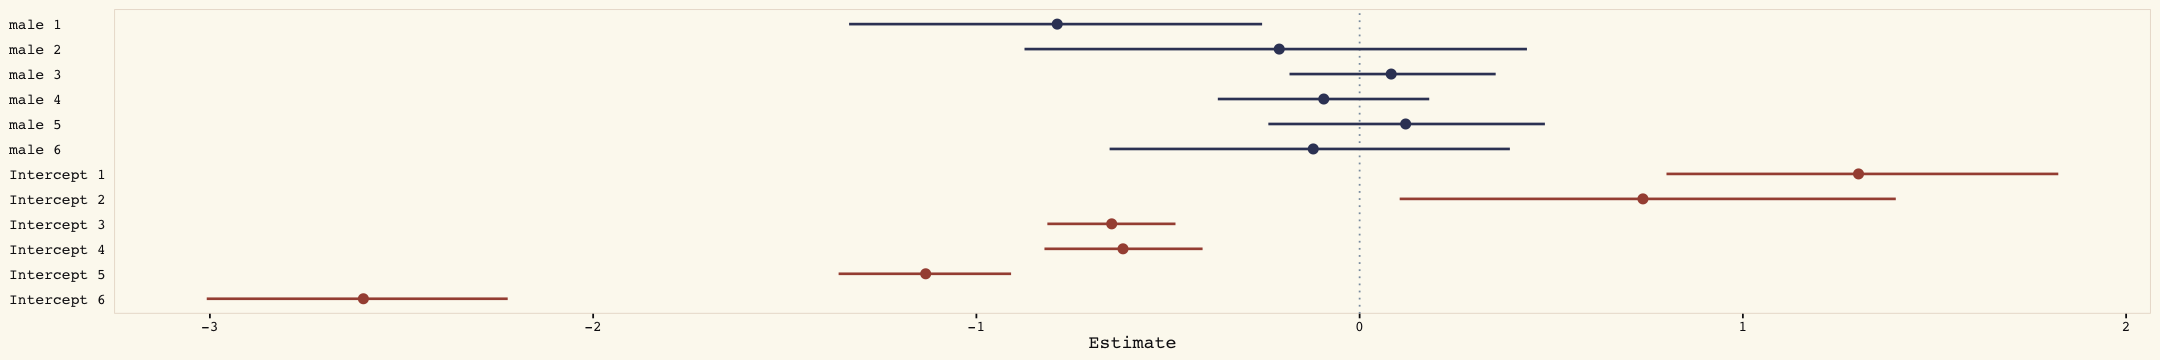

In [94]:
options(repr.plot.width=18, repr.plot.height=3)
# as far as I can tell, because `coef()` yields a list, you have to take out the two 
# random effects one at a time and then bind them together to get them ready for a tibble
rbind(coef(b13.3)$dept_id[, , 1],
      coef(b13.3)$dept_id[, , 2]) %>% 
  as_tibble() %>% 
  mutate(param   = c(paste("Intercept", 1:6), paste("male", 1:6)),
         reorder = c(6:1, 12:7)) %>% 

  # plot
  ggplot(aes(x = reorder(param, reorder))) +
  geom_hline(yintercept = 0, linetype = 3, color = "#8B9DAF") +
  geom_pointrange(aes(ymin = Q2.5, ymax = Q97.5, y = Estimate, color = reorder < 7),
                  shape = 20, size = 3/4) +
  scale_color_manual(values = c("#394165", "#A65141")) +
  xlab(NULL) +
  coord_flip() +
  theme_pearl_earring +
  theme(legend.position = "none",
        axis.ticks.y    = element_blank(),
        axis.text.y     = element_text(hjust = 0))

## 收缩效应

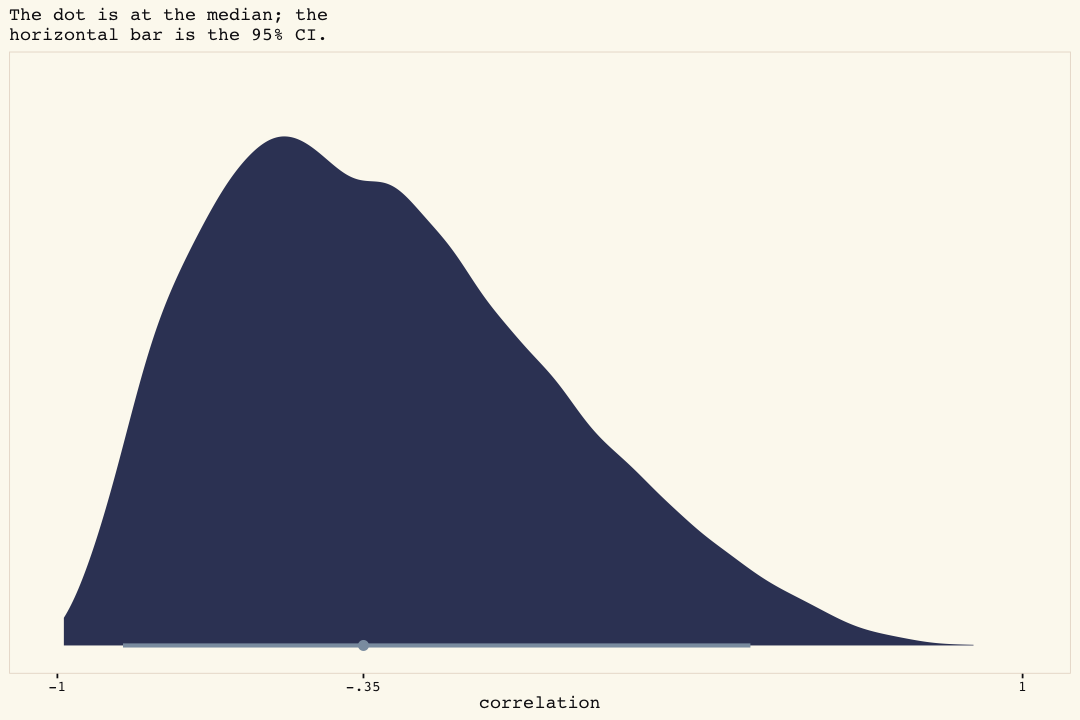

In [97]:
library(tidybayes)
options(repr.plot.width=9, repr.plot.height=6)
post <- posterior_samples(b13.3)

post %>% 
  ggplot(aes(x = cor_dept_id__Intercept__male, y = 0)) +
  geom_halfeyeh(fill = "#394165", color = "#8B9DAF", 
                point_interval = median_qi, .width = .95) +
  scale_x_continuous(limits = c(-1, 1), breaks = c(-1, median(post$cor_dept_id__Intercept__male), 1),
                     labels = c(-1, "-.35", 1)) +
  scale_y_continuous(NULL, breaks = NULL) +
  labs(subtitle = "The dot is at the median; the\nhorizontal bar is the 95% CI.",
       x = "correlation") +
  theme_pearl_earring

In [98]:
# here we put the partially-pooled estimate summaries in a tibble
partially_pooled_params <-
  coef(b13.3)$dept_id[ , 1, ] %>%
  as_tibble() %>%
  set_names("intercept", "slope") %>%
  mutate(dept = 1:n()) %>%
  select(dept, everything())

# in order to calculate the unpooled estimates from the data, we'll need a function that 
# can convert probabilities into the logit metric. if you do the algebra, this is just
# a transformation of the `inv_logit_scaled()` function.
prob_to_logit <- function(x){
  -log((1 / x) -1)
  }

# compute unpooled estimates directly from data
un_pooled_params <-
  d %>%
  group_by(male, dept_id) %>%
  summarise(prob_admit = mean(admit / applications)) %>%
  ungroup() %>%
  mutate(male = ifelse(male == 0, "intercept", "slope")) %>%
  spread(key  = male, value = prob_admit) %>%
  rename(dept = dept_id) %>%
  # here we put our `prob_to_logit()` function to work
  mutate(intercept = prob_to_logit(intercept),
         slope     = prob_to_logit(slope)) %>%
  mutate(slope     = slope - intercept)

# here we combine the partially-pooled and unpooled means into a single data object
params <-
  bind_rows(partially_pooled_params, un_pooled_params) %>%
  mutate(pooled      = rep(c("partially", "not"), each = n() / 2)) %>%
  mutate(dept_letter = rep(LETTERS[1:6], times = 2))  # this will help with plotting

params

dept intercept  slope       pooled    dept_letter
1  1     1.3017556 -0.78908882 partially A          
2  2     0.7392375 -0.20976055 partially B          
3  3    -0.6469424  0.08233811 partially C          
4  4    -0.6174226 -0.09358417 partially D          
5  5    -1.1322976  0.12008725 partially E          
6  6    -2.5995269 -0.12101918 partially F          
7  1     1.5441974 -1.05207596 not       A          
8  2     0.7537718 -0.22002254 not       B          
9  3    -0.6604399  0.12492163 not       C          
10 4    -0.6219709 -0.08198719 not       D          
11 5    -1.1571488  0.20018702 not       E          
12 6    -2.5808479 -0.18889583 not       F

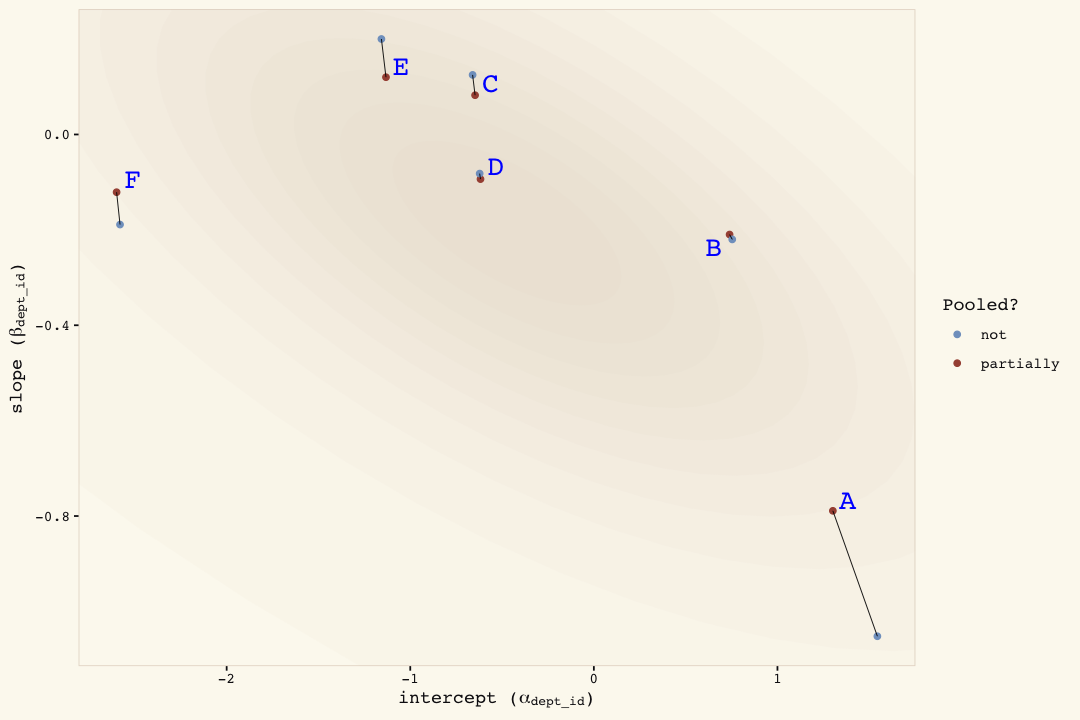

In [106]:
library(ggrepel)

ggplot(data = params, aes(x = intercept, y = slope)) +
  mapply(function(level){
    stat_ellipse(geom  = "polygon", type = "norm",
                 size  = 0, alpha = 1/20, fill = "#E7CDC2",
                 level = level)
    },  
    level = c(seq(from = 1/10, to = 9/10, by = 1/10), .99)) +
  geom_point(aes(group = dept, color = pooled)) +
  geom_line(aes(group = dept), size = 1/4) +
  scale_color_manual("Pooled?",
                     values = c("#80A0C7", "#A65141")) +
  geom_text_repel(data = params %>% filter(pooled == "partially"),
                  aes(label = dept_letter),
                  color = "100F14", size = 6, family = "Courier", seed = 13.6) +
  coord_cartesian(xlim = range(params$intercept),
                  ylim = range(params$slope)) +
  labs(x = expression(paste("intercept (", alpha[dept_id], ")")),
       y = expression(paste("slope (", beta[dept_id], ")"))) +
  theme_pearl_earring

## 模型比较

In [100]:
# 无性别效应模型
b13.4 <- 
  brm(data = d, family = binomial,
      admit | trials(applications) ~ 1 + (1 | dept_id),
      prior = c(prior(normal(0, 10), class = Intercept),
                prior(cauchy(0, 2), class = sd)),
      iter = 5000, warmup = 1000, chains = 4, cores = 4,
      seed = 13,
      control = list(adapt_delta = .99,
                     max_treedepth = 12))

b13.2 <- add_criterion(b13.2, "waic")
b13.3 <- add_criterion(b13.3, "waic")
b13.4 <- add_criterion(b13.4, "waic")

loo_compare(b13.2, b13.3, b13.4, criterion = "waic") %>% 
  print(simplify = F)

Compiling the C++ model

Start sampling



      elpd_diff se_diff elpd_waic se_elpd_waic p_waic se_p_waic waic  se_waic
b13.3   0.0       0.0   -45.7       2.4          6.9    1.5      91.4   4.8  
b13.4  -6.9       7.5   -52.6       9.0          6.6    2.3     105.2  18.0  
b13.2  -8.6       6.6   -54.3       8.2          9.4    3.0     108.5  16.5  


In [ ]:
model_weights(b13.2, b13.3, b13.4, weights = "waic") %>% 
  round(digits = 3)

# 大猩猩数据

In [108]:
library(rethinking)
data(chimpanzees)
d <- chimpanzees
detach(package:rethinking, unload = T)
library(brms)
rm(chimpanzees)

d <-
  d %>%
  select(-recipient) %>%
  mutate(block_id = block)

head(d)

rethinking (Version 1.95)


Attaching package: ‘rethinking’


The following objects are masked from ‘package:brms’:

    LOO, stancode, WAIC


The following object is masked from ‘package:purrr’:

    map


The following object is masked from ‘package:stats’:

    rstudent




actor condition block trial prosoc_left chose_prosoc pulled_left block_id
1 1     0         1      2    0           1            0           1       
2 1     0         1      4    0           0            1           1       
3 1     0         1      6    1           0            0           1       
4 1     0         1      8    0           1            0           1       
5 1     0         1     10    1           1            1           1       
6 1     0         1     12    1           1            1           1

\begin{align*}
\text{pulled_left}_i       & \sim \text{Binomial} (n = 1, p_i) \\
\text{logit} (p_i)         & = \alpha_i + (\beta_{1i} + \beta_{2i} \text{condition}_i) \text{prosoc_left}_i  \\
\alpha_i                   & = \alpha + \alpha_{\text{actor}_i} + \alpha_{\text{block_id}_i} \\
\beta_{1i}                 & = \beta_1 + \beta_{1, \text{actor}_i} + \beta_{1, \text{block_id}_i} \\
\beta_{2i}                 & = \beta_2 + \beta_{2, \text{actor}_i} + \beta_{2, \text{block_id}_i} \\
\begin{bmatrix} \alpha_\text{actor} \\ \beta_{1, \text{actor}} \\ \beta_{2, \text{actor}} \end{bmatrix} & \sim \text{MVNormal} \begin{pmatrix} \begin{bmatrix}0 \\ 0 \\ 0 \end{bmatrix} , \mathbf{S}_\text{actor} \end{pmatrix} \\
\begin{bmatrix} \alpha_\text{block_id} \\ \beta_{1, \text{block_id}} \\ \beta_{2, \text{block_id}} \end{bmatrix} & \sim \text{MVNormal} \begin{pmatrix} \begin{bmatrix}0 \\ 0 \\ 0 \end{bmatrix} , \mathbf{S}_\text{block_id} \end{pmatrix} \\
\mathbf S_\text{actor}     & = \begin{pmatrix} \sigma_{\alpha_\text{actor}} & 0 & 0 \\ 0 & \sigma_{\beta_{1_\text{actor}}} & 0 \\ 0 & 0 & \sigma_{\beta_{2_\text{actor}}} \end{pmatrix} 
\mathbf R_\text{actor} \begin{pmatrix} \sigma_{\alpha_\text{actor}} & 0 & 0 \\ 0 & \sigma_{\beta_{1_\text{actor}}} & 0 \\ 0 & 0 & \sigma_{\beta_{2_\text{actor}}} \end{pmatrix} \\
\mathbf S_\text{block_id}  & = \begin{pmatrix} \sigma_{\alpha_\text{block_id}} & 0 & 0 \\ 0 & \sigma_{\beta_{1_\text{block_id}}} & 0 \\ 0 & 0 & \sigma_{\beta_{2_\text{block_id}}} \end{pmatrix} 
\mathbf R_\text{block_id} \begin{pmatrix} \sigma_{\alpha_\text{block_id}} & 0 & 0 \\ 0 & \sigma_{\beta_{1_\text{block_id}}} & 0 \\ 0 & 0 & \sigma_{\beta_{2_\text{block_id}}} \end{pmatrix} \\
\alpha                     & \sim \text{Normal} (0, 1) \\
\beta_1                    & \sim \text{Normal} (0, 1) \\
\beta_2                    & \sim \text{Normal} (0, 1) \\
(\sigma_{\alpha_\text{actor}}, \sigma_{\beta_{1_\text{actor}}}, \sigma_{\beta_{2_\text{actor}}}) & \sim \text{HalfCauchy} (0, 2) \\
(\sigma_{\alpha_\text{block_id}}, \sigma_{\beta_{1_\text{block_id}}}, \sigma_{\beta_{2_\text{block_id}}}) & \sim \text{HalfCauchy} (0, 2) \\
\mathbf R_\text{actor}     & \sim \text{LKJcorr} (4) \\
\mathbf R_\text{block_id}  & \sim \text{LKJcorr} (4),
\end{align*}

其中每个 $\mathbf R$ 都是 $3 \times 3$ 相关系数矩阵。

In [109]:
b13.6 <- 
  brm(data = d, family = binomial,
      pulled_left | trials(1) ~ 1 + prosoc_left + condition:prosoc_left +
        (1 + prosoc_left + condition:prosoc_left | actor) +
        (1 + prosoc_left + condition:prosoc_left | block_id),
      prior = c(prior(normal(0, 1), class = Intercept),
                prior(normal(0, 1), class = b),
                prior(cauchy(0, 2), class = sd),
                prior(lkj(4), class = cor)),
      iter = 1e4, warmup = 2000, chains = 4, cores = 4,
      seed = 13)

ratios_cp <- neff_ratio(b13.6)

neff <-
  ratios_cp %>% 
  as_tibble %>% 
  rename(neff_ratio = value) %>% 
  mutate(neff       = neff_ratio * 12000)

head(neff)

system("osascript -e \'display notification \"程序\" with title \"跑完了\"\'")
beepr::beep(sound = 4)

Only 2 levels detected so that family 'bernoulli' might be a more efficient choice.

Compiling the C++ model

Start sampling

Warning message:
“There were 2 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”


neff_ratio neff    
1 0.3164877  3797.852
2 0.6298026  7557.631
3 0.6997977  8397.573
4 0.3704415  4445.298
5 0.5878292  7053.951
6 0.5483546  6580.255

## 查看有效样本
`brms`默认采用非中心参数化

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 9 rows containing missing values (position_quasirandom).”


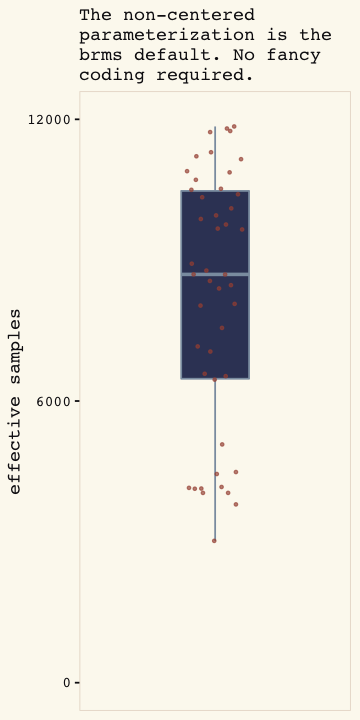

In [118]:
library(ggbeeswarm)
options(repr.plot.width=3, repr.plot.height=6)
neff %>%
  ggplot(aes(x = factor(0), y = neff)) +
  geom_boxplot(fill = "#394165", color = "#8B9DAF") +
  geom_quasirandom(method = "tukeyDense",
                   size = 2/3, color = "#A65141", alpha = 2/3) +
  scale_x_discrete(NULL, breaks = NULL,
                   expand = c(.75, .75)) +
  scale_y_continuous(limits = c(0, 12000), breaks = c(0, 6000, 12000)) +
  labs(y = "effective samples",
       subtitle = "The non-centered\nparameterization is the\nbrms default. No fancy\ncoding required.") +
  theme_pearl_earring

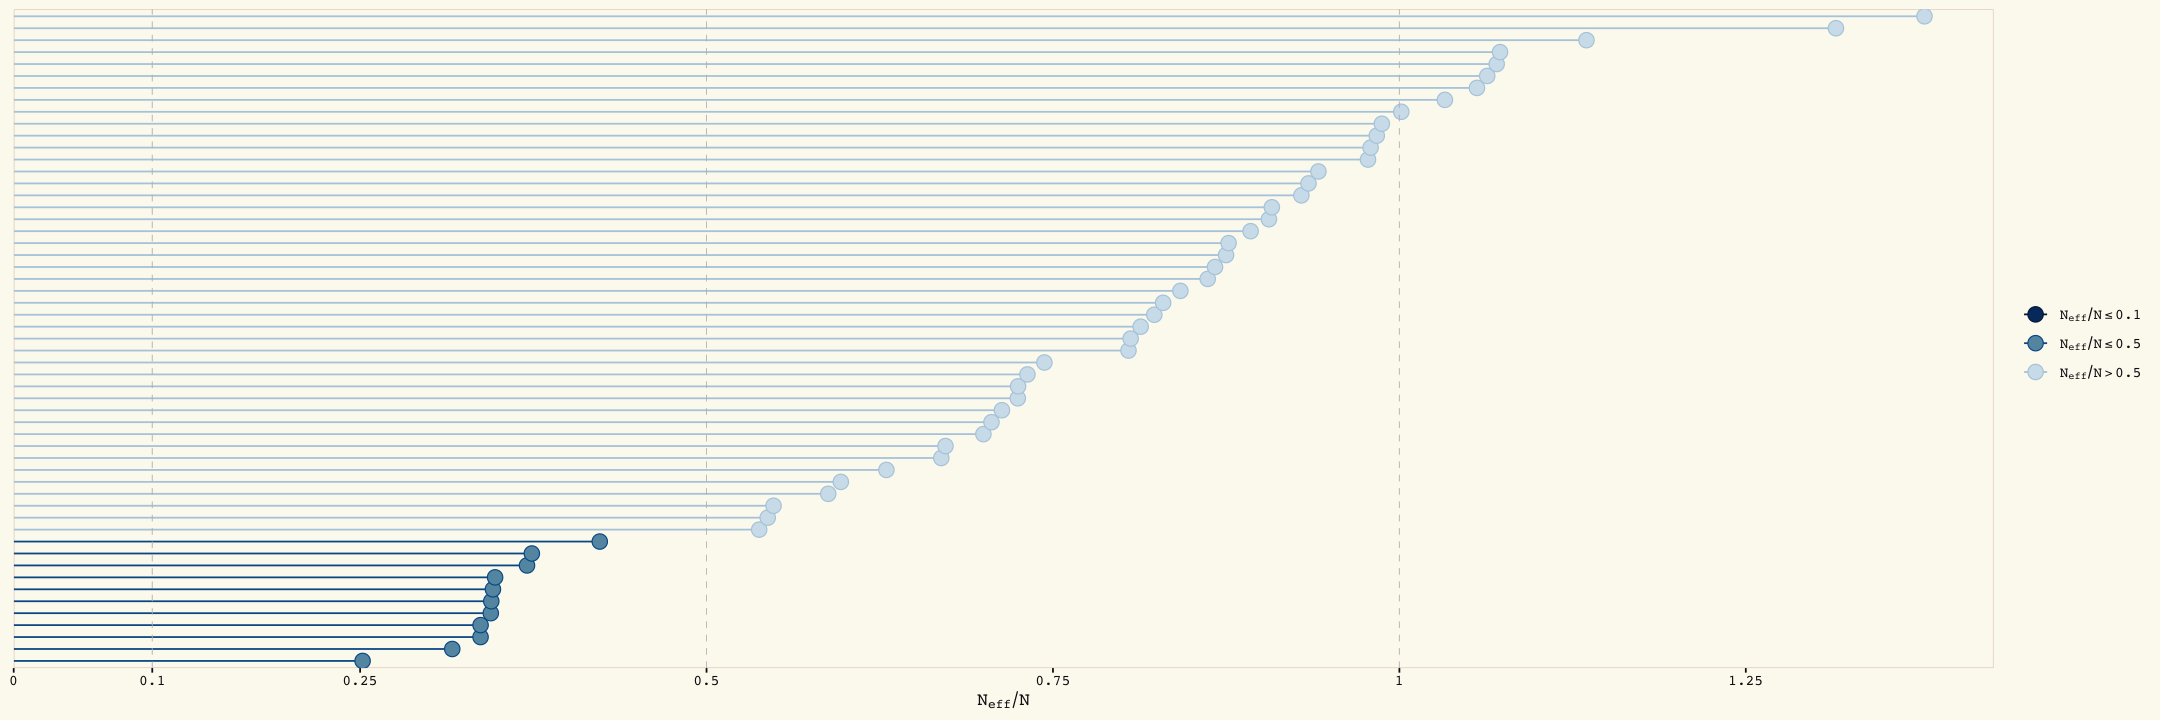

In [121]:
library(bayesplot)
options(repr.plot.width=18, repr.plot.height=6)
mcmc_neff(ratios_cp, size = 4) +
  theme_pearl_earring

## 标准差参数

In [122]:
tidy(b13.6) %>%
  filter(str_detect(term , "sd_")) %>%
  mutate_if(is.numeric, round, digits = 2)

term                               estimate std.error lower upper
1 sd_actor__Intercept                2.36     0.91      1.30  4.03 
2 sd_actor__prosoc_left              0.46     0.37      0.04  1.14 
3 sd_actor__prosoc_left:condition    0.51     0.47      0.03  1.40 
4 sd_block_id__Intercept             0.22     0.20      0.02  0.61 
5 sd_block_id__prosoc_left           0.57     0.41      0.07  1.31 
6 sd_block_id__prosoc_left:condition 0.52     0.42      0.04  1.30

首先，回想一下`fitted()`默认情况下返回summary值。如果需要个体值，可设置`summary = FALSE`。同时`fitted()`默认使用后验的所有iter，本例为12,000

In [125]:
fitted(b13.6,
       summary = F,
       nsamples = 1000) %>% 
  str()

 num [1:1000, 1:504] 0.3 0.322 0.393 0.35 0.236 ...


In [126]:
b12.5 <- 
  brm(data = d, family = binomial,
      pulled_left | trials(1) ~ 1 + prosoc_left + condition:prosoc_left + 
        (1 | actor) + (1 | block_id),
      prior = c(prior(normal(0, 10), class = Intercept),
                prior(normal(0, 10), class = b),
                prior(cauchy(0, 1), class = sd)),
      iter = 1e4, warmup = 2000, chains = 4, cores = 4,
      seed = 13)

b13.6 <- add_criterion(b13.6, "waic")
b12.5 <- add_criterion(b12.5, "waic")

loo_compare(b13.6, b12.5, criterion = "waic") %>% 
  print(simplify = F)

system("osascript -e \'display notification \"程序\" with title \"跑完了\"\'")
beepr::beep(sound = 4)

Only 2 levels detected so that family 'bernoulli' might be a more efficient choice.

Compiling the C++ model

Start sampling

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”


      elpd_diff se_diff elpd_waic se_elpd_waic p_waic se_p_waic waic   se_waic
b12.5    0.0       0.0  -266.3       9.8         10.4    0.5     532.7   19.7 
b13.6   -1.0       2.0  -267.4      10.0         18.3    0.9     534.7   19.9 


In [127]:
model_weights(b13.6, b12.5, weights = "waic")

b13.6    b12.5 
0.261393 0.738607

# 连续类别与高斯过程

## 岛屿工具变量与空间自相关

In [5]:
# load the distance matrix
library(rethinking)
data(islandsDistMatrix)

# display short column names, so fits on screen
d_mat <- islandsDistMatrix
colnames(d_mat) <- c("Ml", "Ti", "SC", "Ya", "Fi", 
                     "Tr", "Ch", "Mn", "To", "Ha")
round(d_mat, 1)

Ml  Ti  SC  Ya  Fi  Tr  Ch  Mn  To  Ha 
Malekula   0.0 0.5 0.6 4.4 1.2 2.0 3.2 2.8 1.9 5.7
Tikopia    0.5 0.0 0.3 4.2 1.2 2.0 2.9 2.7 2.0 5.3
Santa Cruz 0.6 0.3 0.0 3.9 1.6 1.7 2.6 2.4 2.3 5.4
Yap        4.4 4.2 3.9 0.0 5.4 2.5 1.6 1.6 6.1 7.2
Lau Fiji   1.2 1.2 1.6 5.4 0.0 3.2 4.0 3.9 0.8 4.9
Trobriand  2.0 2.0 1.7 2.5 3.2 0.0 1.8 0.8 3.9 6.7
Chuuk      3.2 2.9 2.6 1.6 4.0 1.8 0.0 1.2 4.8 5.8
Manus      2.8 2.7 2.4 1.6 3.9 0.8 1.2 0.0 4.6 6.7
Tonga      1.9 2.0 2.3 6.1 0.8 3.9 4.8 4.6 0.0 5.0
Hawaii     5.7 5.3 5.4 7.2 4.9 6.7 5.8 6.7 5.0 0.0

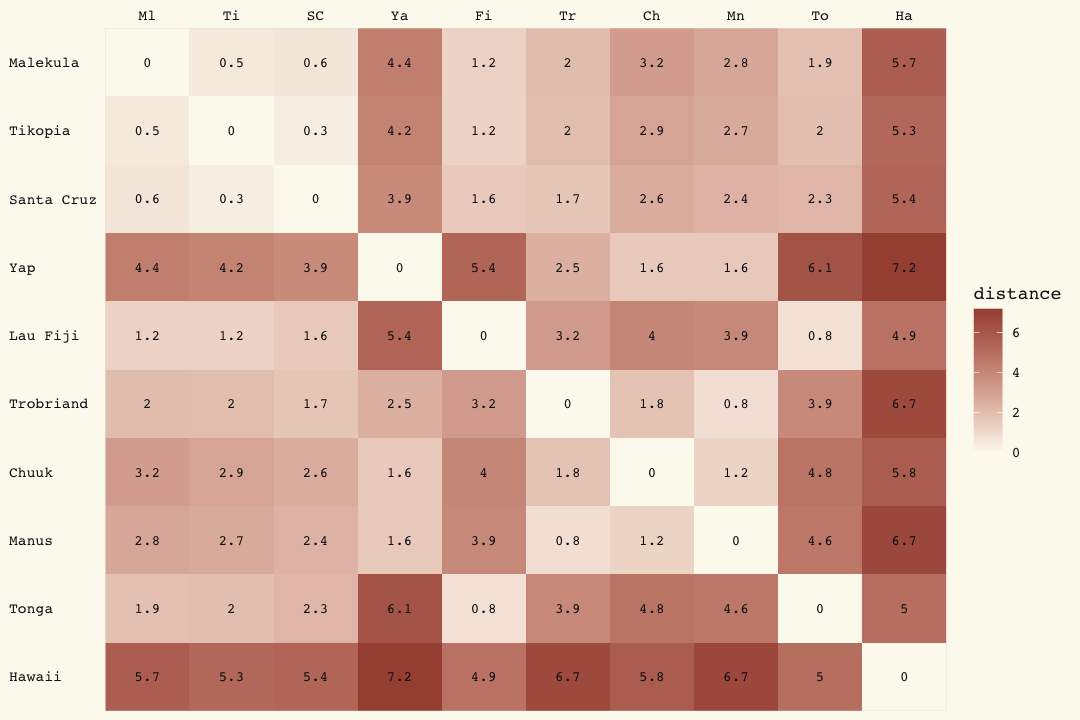

In [6]:
options(repr.plot.width=9, repr.plot.height=6)
d_mat %>%
  as_tibble() %>%
  gather() %>%
  rename(column = key,
         distance = value) %>%
  mutate(row          = rep(rownames(d_mat), times = 10),
         row_order    = rep(9:0,            times = 10),
         column_order = rep(0:9,            each  = 10)) %>%
  
  ggplot(aes(x = reorder(column, column_order), 
             y = reorder(row,    row_order))) + 
  geom_raster(aes(fill = distance)) + 
  geom_text(aes(label = round(distance, digits = 1)),
            size = 3, family = "Courier", color = "#100F14") +
  scale_fill_gradient(low = "#FCF9F0", high = "#A65141") +
  scale_x_discrete(NULL, position = "top", expand = c(0, 0)) +
  scale_y_discrete(NULL, expand = c(0, 0)) +
  theme_pearl_earring +
  theme(axis.ticks  = element_blank(),
        axis.text.y = element_text(hjust = 0))

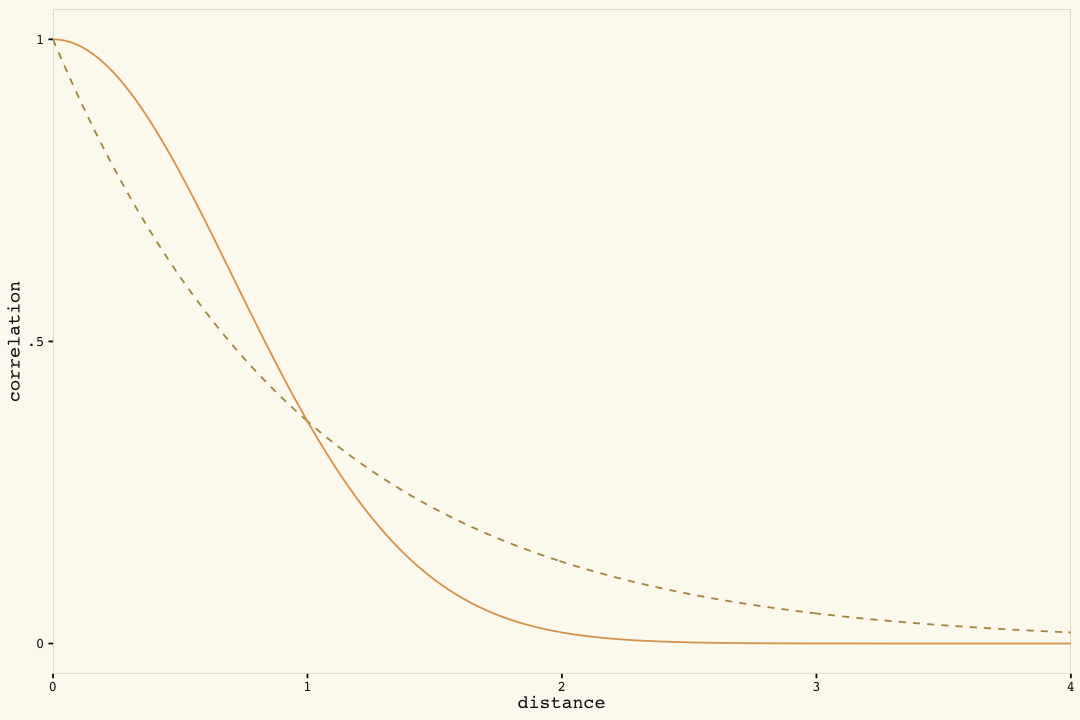

In [7]:
tibble(
  x       = seq(from = 0, to = 4, by = .01),
  linear  = exp(-1 * x),              # 线性指数
  squared = exp(-1 * x^2)) %>%        # 二次方指数
  
  ggplot(aes(x = x)) +
  geom_line(aes(y = linear),
            color = "#B1934A", linetype = 2) +
  geom_line(aes(y = squared),
            color = "#DCA258") +
  scale_x_continuous("distance", expand = c(0, 0)) +
  scale_y_continuous("correlation", 
                     breaks = c(0, .5, 1),
                     labels = c(0, ".5", 1)) +
  theme_pearl_earring

In [8]:
data(Kline2) # load the ordinary data, now with coordinates

d <- 
  Kline2 %>%
  mutate(society = 1:10)

rm(Kline2)

d %>% glimpse()

Rows: 10
Columns: 10
$ culture     <fct> Malekula, Tikopia, Santa Cruz, Yap, Lau Fiji, Trobriand,…
$ population  <int> 1100, 1500, 3600, 4791, 7400, 8000, 9200, 13000, 17500, …
$ contact     <fct> low, low, low, high, high, high, high, low, high, low
$ total_tools <int> 13, 22, 24, 43, 33, 19, 40, 28, 55, 71
$ mean_TU     <dbl> 3.2, 4.7, 4.0, 5.0, 5.0, 4.0, 3.8, 6.6, 5.4, 6.6
$ lat         <dbl> -16.3, -12.3, -10.7, 9.5, -17.7, -8.7, 7.4, -2.1, -21.2,…
$ lon         <dbl> 167.5, 168.8, 166.0, 138.1, 178.1, 150.9, 151.6, 146.9, …
$ lon2        <dbl> -12.5, -11.2, -14.0, -41.9, -1.9, -29.1, -28.4, -33.1, 4…
$ logpop      <dbl> 7.003065, 7.313220, 8.188689, 8.474494, 8.909235, 8.9871…
$ society     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10


希望在高斯过程中包括纬度和经度（即分别为`lat`和`long2`，易于绘图）

In [9]:
detach(package:rethinking, unload = T)
library(brms)

b13.7 <- 
  brm(data = d, family = poisson,
      total_tools ~ 1 + gp(lat, lon2) + logpop,          # 总工具 = 截距 + 高斯过程(lat, lon2) + 人口对数
      prior = c(prior(normal(0, 10), class = Intercept),
                prior(normal(0, 1), class = b),
                prior(inv_gamma(2.874624, 0.393695), class = lscale),
                prior(cauchy(0, 1), class = sdgp)),
      iter = 1e4, warmup = 2000, chains = 4, cores = 4,
      seed = 13,
      control = list(adapt_delta = 0.999,
                     max_treedepth = 12))

posterior_summary(b13.7) %>%
  round(digits = 2)

system("osascript -e \'display notification \"程序\" with title \"跑完了\"\'")
beepr::beep(sound = 4)

Loading required package: Rcpp

Loading 'brms' package (version 2.12.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following object is masked from ‘package:rstan’:

    loo


The following object is masked from ‘package:stats’:

    ar


Warning message:
“The global prior 'inv_gamma(2.874624, 0.393695)' of class 'lscale' will not be used in the model as all related coefficients have individual priors already. If you did not set those priors yourself, then maybe brms has assigned default priors. See ?set_prior and ?get_prior for more details.”
Compiling the C++ model

Start sampling

Warning message:
“There were 2 divergent transitions after warmup. Increasing adapt_delta above 0.999 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”


Estimate Est.Error Q2.5   Q97.5 
b_Intercept         1.45   1.13       -0.80   3.77
b_logpop            0.23   0.11        0.02   0.45
sdgp_gplatlon2      0.52   0.36        0.16   1.44
lscale_gplatlon2    0.23   0.13        0.07   0.56
zgp_gplatlon2[1]   -0.60   0.79       -2.17   0.94
zgp_gplatlon2[2]    0.44   0.85       -1.24   2.12
zgp_gplatlon2[3]   -0.62   0.70       -1.94   0.89
zgp_gplatlon2[4]    0.88   0.69       -0.44   2.30
zgp_gplatlon2[5]    0.26   0.75       -1.22   1.75
zgp_gplatlon2[6]   -1.00   0.79       -2.56   0.61
zgp_gplatlon2[7]    0.14   0.72       -1.41   1.51
zgp_gplatlon2[8]   -0.18   0.86       -1.87   1.58
zgp_gplatlon2[9]    0.41   0.91       -1.47   2.12
zgp_gplatlon2[10]  -0.31   0.82       -1.95   1.30
lp__              -51.46   3.13      -58.49 -46.40

`brms`的参数化：$k(x_{i},x_{j}) = sdgp^2 \exp^{\frac{-||x_i - x_j||^2}{2 lscale^2}}$，`sdgp`对应`η`，需要对`sdgp_gplatlon2`取平方以与书中的`etasq`对应

In [50]:
# library(tidybayes)
posterior_samples(b13.7) %>% 
  transmute(sdgp_squared = sdgp_gplatlon2^2) %>% 
  mean_hdi(sdgp_squared, .width = .89) %>% 
  mutate_if(is.double, round, digits = 3)

sdgp_squared .lower .upper .width .point .interval
1 0.408        0.001  0.758  0.89   mean   hdi

查看`brms`中的$2 \cdot lscale^2$，这似乎与书中的$\rho^2$等同(即`rhosq`)，$\rho^{2}=\frac{1}{2 \cdot lscale^2}$

In [51]:
posterior_samples(b13.7) %>% 
  transmute(rho_squared = 1 / (2 * lscale_gplatlon2^2)) %>% 
  mean_hdi(rho_squared, .width = .89) %>% 
  mutate_if(is.double, round, digits = 3)

rho_squared .lower .upper .width .point .interval
1 22.121      0.374  47.954 0.89   mean   hdi

`brms`针对`lscale`使用了一个非常特别的逆γ先验`inv_gamma(2.874624, 0.393695)`，[参见此处](https://betanalpha.github.io/assets/case_studies/gp_part3/part3.html)

In [43]:
get_prior(data = d, family = poisson,
          total_tools ~ 1 + gp(lat, lon2) + logpop)

prior                         class     coef      group resp dpar nlpar bound
1                               b                                              
2                               b         logpop                               
3 student_t(3, 3, 10)           Intercept                                      
4                               lscale                                         
5 inv_gamma(2.874624, 0.393695) lscale    gplatlon2                            
6 student_t(3, 0, 10)           sdgp                                           
7                               sdgp      gplatlon2

## 比较`brms`与`rethinking`

In [16]:
detach(package:brms, unload = T)
library(rethinking)

m13.7 <- map2stan(
    alist(
        total_tools ~ dpois(lambda),
        log(lambda) <- a + g[society] + bp*logpop,
        g[society] ~ GPL2( Dmat , etasq , rhosq , 0.01 ),
        a ~ dnorm(0,10),
        bp ~ dnorm(0,1),
        etasq ~ dcauchy(0,1),
        rhosq ~ dcauchy(0,1)
    ),
    data=list(
        total_tools=d$total_tools,
        logpop=d$logpop,
        society=d$society,
        Dmat=islandsDistMatrix),
    warmup=2000 , iter=1e4 , chains=4)

rethinking (Version 1.95)


Attaching package: ‘rethinking’


The following objects are masked from ‘package:brms’:

    LOO, stancode, WAIC


The following object is masked from ‘package:purrr’:

    map


The following object is masked from ‘package:stats’:

    rstudent





SAMPLING FOR MODEL '2b2cd4999e11fe35540392d0c515a61a' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 7.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.77 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1: Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 1: Iteration: 2000 / 10000 [ 20%]  (Warmup)
Chain 1: Iteration: 2001 / 10000 [ 20%]  (Sampling)
Chain 1: Iteration: 3000 / 10000 [ 30%]  (Sampling)
Chain 1: Iteration: 4000 / 10000 [ 40%]  (Sampling)
Chain 1: Iteration: 5000 / 10000 [ 50%]  (Sampling)
Chain 1: Iteration: 6000 / 10000 [ 60%]  (Sampling)
Chain 1: Iteration: 7000 / 10000 [ 70%]  (Sampling)
Chain 1: Iteration: 8000 / 10000 [ 80%]  (Sampling)
Chain 1: Iteration: 9000 / 10000 [ 90%]  (Sampling)
Chain 1: Iteration: 10000 / 10000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 5.168 seconds (Warm-up)
Chain 1:                14.7197 seco

Computing WAIC



### 后验与斜率

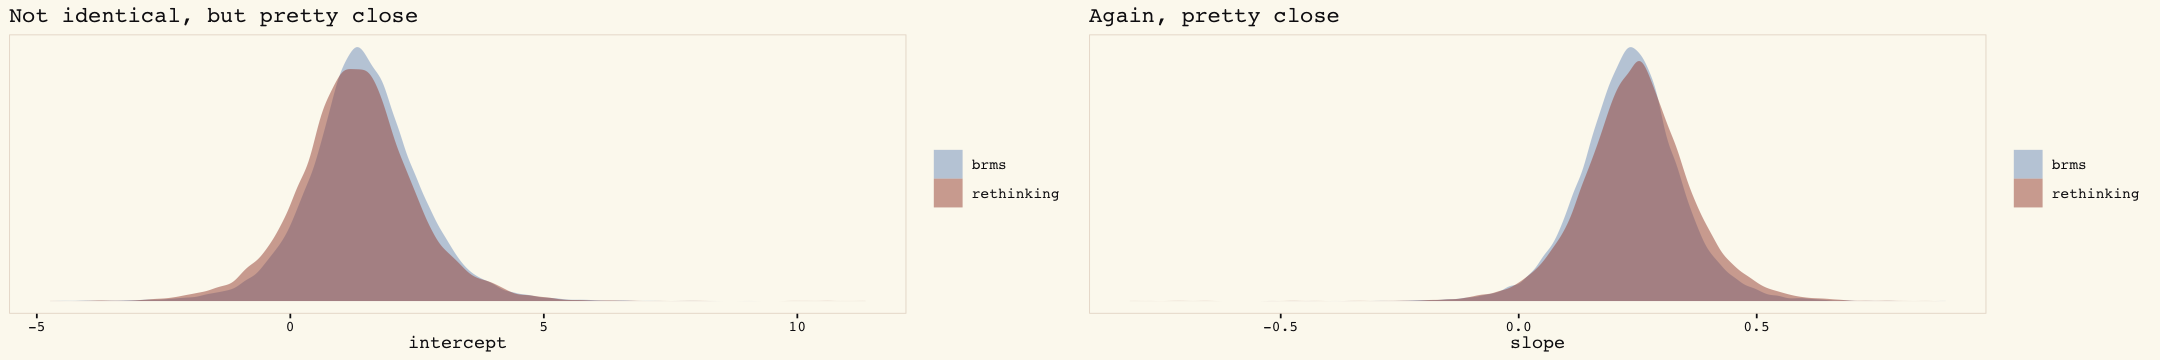

In [44]:
options(repr.plot.width=18, repr.plot.height=3)

# rethinking-based posterior
post_m13.7 <- rethinking::extract.samples(m13.7)[2:5] %>% as_tibble()

# detach(package:rethinking, unload = T)
library(brms)

# brms-based posterior
post_b13.7 <- posterior_samples(b13.7)

p3 = post_m13.7[, "a"] %>% 
  bind_rows(post_b13.7%>% 
              transmute(a = b_Intercept)) %>% 
  mutate(package = rep(c("rethinking", "brms"), each = nrow(post_m13.7))) %>% 
  
  ggplot(aes(x = a, fill = package)) +
  geom_density(size = 0, alpha = 1/2) +
  scale_fill_manual(NULL, values = c("#80A0C7", "#A65141")) +
  scale_y_continuous(NULL, breaks = NULL) +
  labs(title = "Not identical, but pretty close",
       x     = "intercept") +
  theme_pearl_earring

p4 = post_m13.7[, "bp"] %>% 
  bind_rows(post_b13.7 %>% 
              transmute(bp = b_logpop)
              ) %>% 
  mutate(package = rep(c("rethinking", "brms"), each = nrow(post_m13.7))) %>% 
  
  ggplot(aes(x = bp, fill = package)) +
  geom_density(size = 0, alpha = 1/2) +
  scale_fill_manual(NULL, values = c("#80A0C7", "#A65141")) +
  scale_y_continuous(NULL, breaks = NULL) +
  labs(title = "Again, pretty close",
       x     = "slope") +
  theme_pearl_earring

cowplot::plot_grid(p3, p4, ncol = 2)

### $\eta^2$与$\rho^2$

Warning message:
“Removed 621 rows containing non-finite values (stat_density).”
Warning message:
“Removed 3471 rows containing non-finite values (stat_density).”


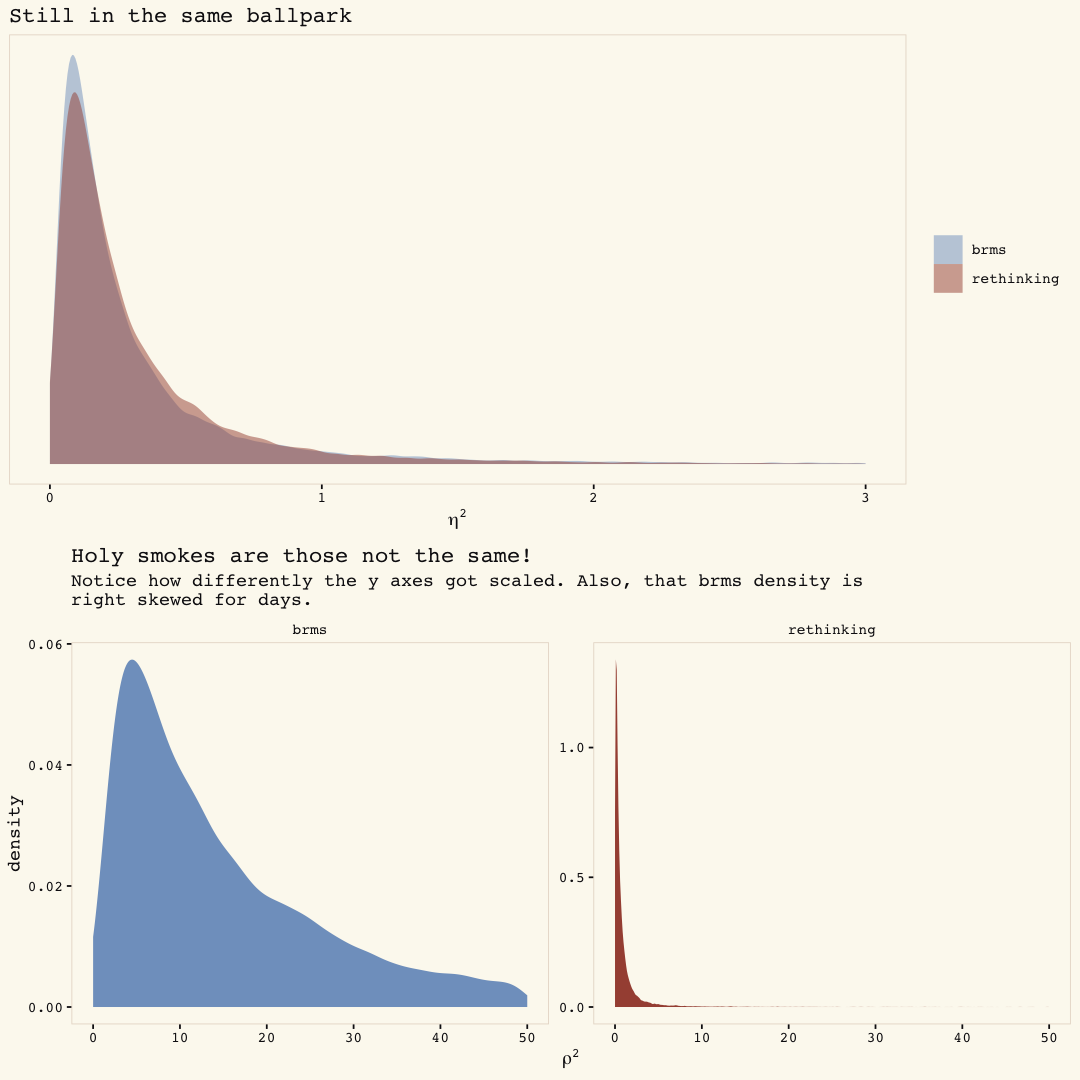

In [45]:
#转换 eta^2
options(repr.plot.width=9, repr.plot.height=9)
p5 = post_m13.7[, "etasq"] %>% 
  bind_rows(post_b13.7 %>% 
              transmute(etasq = sdgp_gplatlon2^2)) %>% 
  mutate(package = rep(c("rethinking", "brms"), each = nrow(post_m13.7))) %>% 
  
  ggplot(aes(x = etasq, fill = package)) +
  geom_density(size = 0, alpha = 1/2) +
  scale_fill_manual(NULL, values = c("#80A0C7", "#A65141")) +
  scale_x_continuous(limits = c(0, 3)) +
  scale_y_continuous(NULL, breaks = NULL) +
  labs(title = "Still in the same ballpark",
       x     = expression(eta^2)) +
  theme_pearl_earring

# 根据`brms`后验转换rho^2
p6 = post_m13.7[, "rhosq"] %>%
  bind_rows(post_b13.7%>% 
              transmute(rhosq = 1 / (2 * (lscale_gplatlon2^2)))
            ) %>% 
  mutate(package = rep(c("rethinking", "brms"), each = nrow(post_m13.7))) %>% 
  
  ggplot(aes(x = rhosq, fill = package)) +
  geom_density(size = 0) +
  scale_fill_manual(NULL, values = c("#80A0C7", "#A65141")) +
  scale_x_continuous(limits = c(0, 50)) +
  labs(title    = "Holy smokes are those not the same!",
       subtitle = "Notice how differently the y axes got scaled. Also, that brms density is\nright skewed for days.",
       x        = expression(rho^2)) +
  theme_pearl_earring +
  theme(legend.position = "none") +
  facet_wrap(~package, scales = "free_y")

cowplot::plot_grid(p5, p6, nrow = 2)

## 计算空间协方差

Warning message:
“Removed 524 row(s) containing missing values (geom_path).”


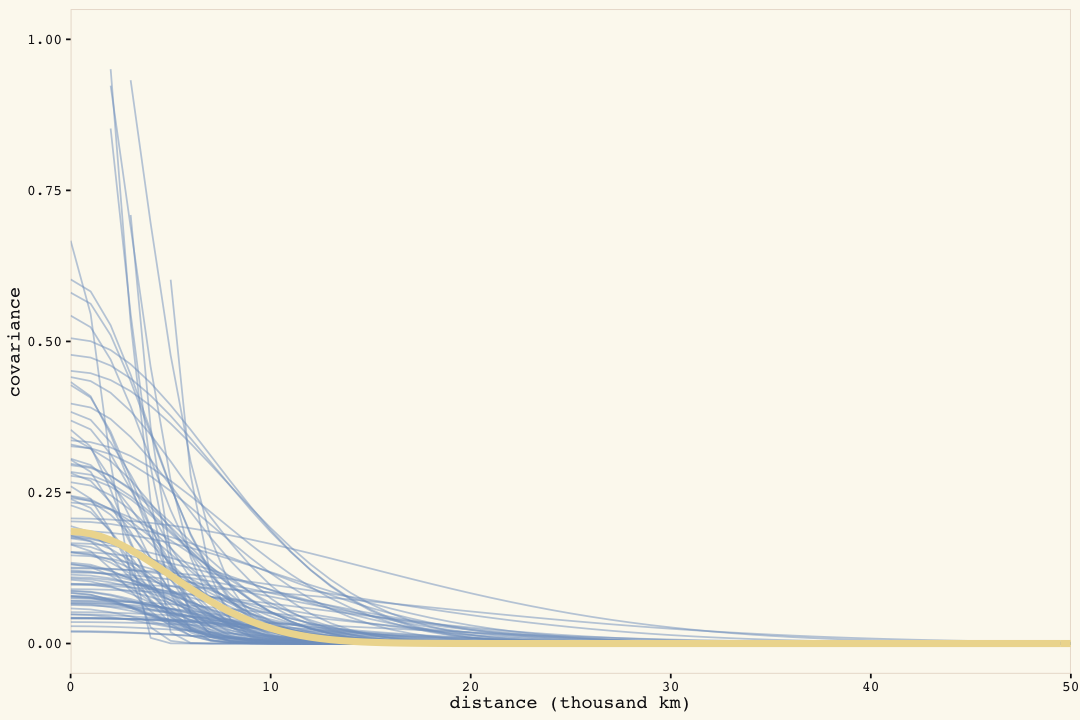

In [40]:
# for `sample_n()`
set.seed(13)
options(repr.plot.width=9, repr.plot.height=6)
# wrangle
post_b13.7 %>% 
  transmute(iter  = 1:n(),
            etasq = sdgp_gplatlon2^2,
            rhosq = lscale_gplatlon2^2 * .5) %>% 
  sample_n(100) %>%                                      # 100 个样本
  expand(nesting(iter, etasq, rhosq),
         x = seq(from = 0, to = 55, by = 1)) %>% 
  mutate(covariance = etasq * exp(-rhosq * x^2)) %>% 
  
  # plot
  ggplot(aes(x = x, y = covariance)) +
  geom_line(aes(group = iter),
            size = 1/2, alpha = 1/2, color = "#80A0C7") +
  stat_function(fun = function(x) median(post_b13.7$sdgp_gplatlon2)^2 *
                  exp(-median(post_b13.7$lscale_gplatlon2)^2 *.5 * x^2),
                color = "#EEDA9D", size = 2) +
  scale_x_continuous("distance (thousand km)", expand = c(0, 0),
                     limits = c(0, 50), breaks = seq(from = 0, to = 50, by = 10)) +
  scale_y_continuous(limits = c(0,1)) +
  theme_pearl_earring

将协方差阵**K**转化为相关矩阵

In [52]:
# 计算不同岛屿协方差的后验中位数
k <- matrix(0, nrow = 10, ncol = 10)
for (i in 1:10)
    for (j in 1:10)
        k[i, j] <- median(post_b13.7$sdgp_gplatlon2^2) * 
  exp(-median(post_b13.7$lscale_gplatlon2^2) * 
        islandsDistMatrix[i, j]^2)

diag(k) <- median(post_b13.7$sdgp_gplatlon2^2) + 0.01

k %>% round(2)

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,] 0.20 0.18 0.18 0.09 0.17 0.16 0.12 0.14 0.16 0.05 
 [2,] 0.18 0.20 0.18 0.09 0.17 0.16 0.13 0.14 0.16 0.06 
 [3,] 0.18 0.18 0.20 0.10 0.17 0.17 0.14 0.15 0.15 0.06 
 [4,] 0.09 0.09 0.10 0.20 0.06 0.15 0.17 0.17 0.04 0.02 
 [5,] 0.17 0.17 0.17 0.06 0.20 0.12 0.10 0.10 0.18 0.07 
 [6,] 0.16 0.16 0.17 0.15 0.12 0.20 0.16 0.18 0.10 0.03 
 [7,] 0.12 0.13 0.14 0.17 0.10 0.16 0.20 0.17 0.07 0.05 
 [8,] 0.14 0.14 0.15 0.17 0.10 0.18 0.17 0.20 0.08 0.03 
 [9,] 0.16 0.16 0.15 0.04 0.18 0.10 0.07 0.08 0.20 0.07 
[10,] 0.05 0.06 0.06 0.02 0.07 0.03 0.05 0.03 0.07 0.20

In [53]:
# 转化为相关阵
rho <- round(cov2cor(k), 2)

# add row/col names for convenience
colnames(rho) <- c("Ml","Ti","SC","Ya","Fi","Tr","Ch","Mn","To","Ha")
rownames(rho) <- colnames(rho)

rho %>% round(2)

Ml   Ti   SC   Ya   Fi   Tr   Ch   Mn   To   Ha  
Ml 1.00 0.94 0.93 0.44 0.89 0.80 0.63 0.70 0.83 0.26
Ti 0.94 1.00 0.95 0.47 0.89 0.81 0.68 0.71 0.81 0.31
SC 0.93 0.95 1.00 0.52 0.86 0.84 0.73 0.76 0.77 0.30
Ya 0.44 0.47 0.52 1.00 0.30 0.75 0.86 0.86 0.21 0.12
Fi 0.89 0.89 0.86 0.30 1.00 0.63 0.50 0.52 0.93 0.37
Tr 0.80 0.81 0.84 0.75 0.63 1.00 0.83 0.92 0.52 0.16
Ch 0.63 0.68 0.73 0.86 0.50 0.83 1.00 0.89 0.38 0.25
Mn 0.70 0.71 0.76 0.86 0.52 0.92 0.89 1.00 0.41 0.16
To 0.83 0.81 0.77 0.21 0.93 0.52 0.38 0.41 1.00 0.35
Ha 0.26 0.31 0.30 0.12 0.37 0.16 0.25 0.16 0.35 1.00

In [54]:
d %>% 
  transmute(psize = logpop / max(logpop)) %>% 
  transmute(psize = exp(psize * 1.5) - 2)

psize    
1  0.3134090
2  0.4009582
3  0.6663711
4  0.7592196
5  0.9066890
6  0.9339560
7  0.9834797
8  1.1096138
9  1.2223112
10 2.4816891

In [55]:
tidy_rho <-
  rho %>%
  data.frame() %>% 
  rownames_to_column() %>% 
  bind_cols(d %>% select(culture, logpop, total_tools, lon2, lat)) %>% 
  gather(colname, correlation, -rowname, -culture, -logpop, -total_tools, -lon2, -lat) %>% 
  mutate(group = str_c(pmin(rowname, colname), pmax(rowname, colname))) %>%
  select(rowname, colname, group, culture, everything())

head(tidy_rho)

rowname colname group culture    logpop   total_tools lon2  lat   correlation
1 Ml      Ml      MlMl  Malekula   7.003065 13          -12.5 -16.3 1.00       
2 Ti      Ml      MlTi  Tikopia    7.313220 22          -11.2 -12.3 0.94       
3 SC      Ml      MlSC  Santa Cruz 8.188689 24          -14.0 -10.7 0.93       
4 Ya      Ml      MlYa  Yap        8.474494 43          -41.9   9.5 0.44       
5 Fi      Ml      FiMl  Lau Fiji   8.909235 33           -1.9 -17.7 0.89       
6 Tr      Ml      MlTr  Trobriand  8.987197 19          -29.1  -8.7 0.80

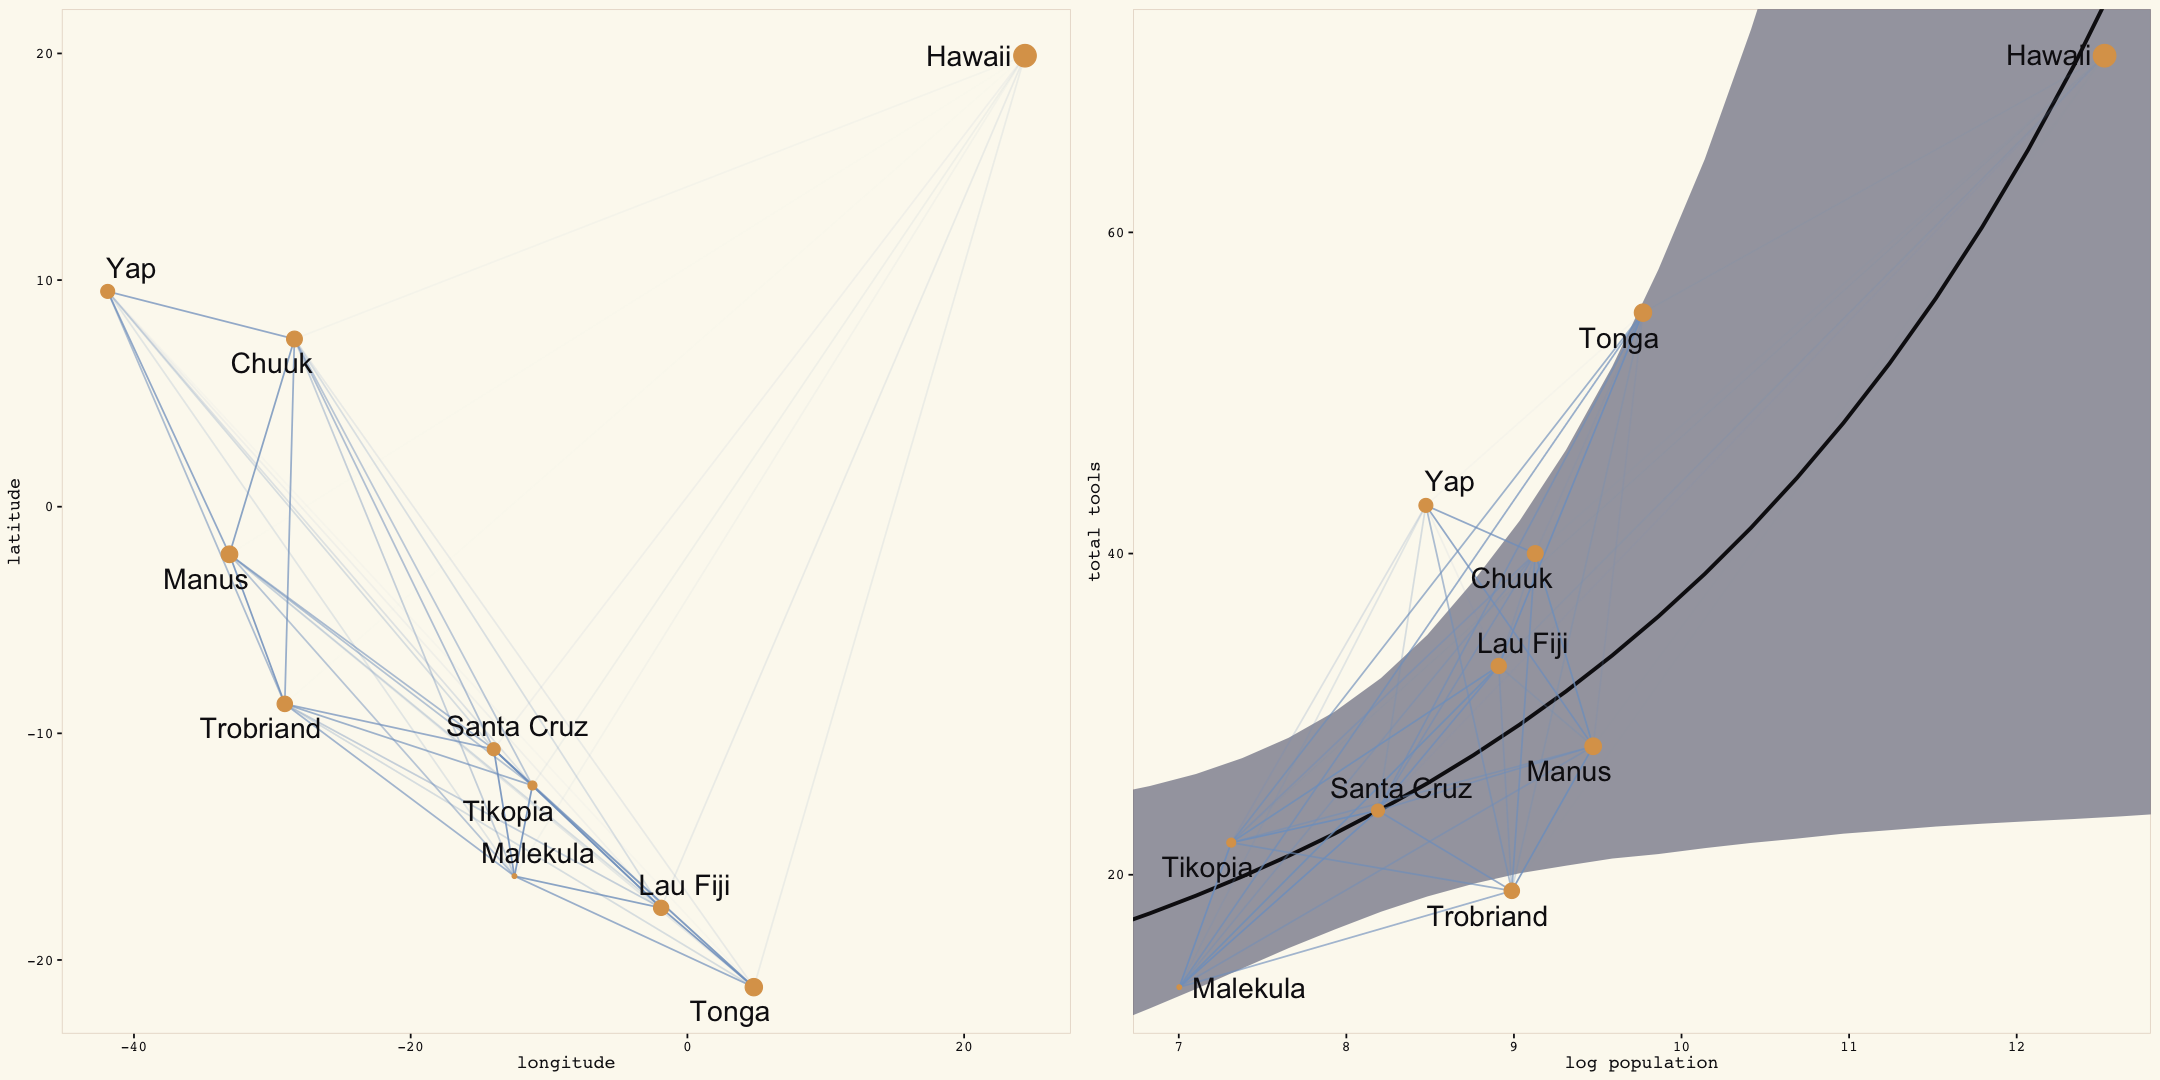

In [62]:
library(ggrepel)
options(repr.plot.width=18, repr.plot.height=9)

p7 = ggplot(tidy_rho, aes(x = lon2, y = lat)) +
  geom_line(aes(group = group, alpha = correlation^2),
            color = "#80A0C7") +
  geom_point(data = d, aes(size = logpop), color = "#DCA258") +
  geom_text_repel(data = d, aes(label = culture), 
                  seed = 0, point.padding = .3, size = 6, color = "#100F14") +
  scale_alpha_continuous(range = c(0, 1)) +
  labs(x = "longitude",
       y = "latitude") +
  coord_cartesian(xlim = range(d$lon2),
                  ylim = range(d$lat)) +
  theme(legend.position = "none") +
  theme_pearl_earring 

# new data for `fitted()`
nd <- 
  tibble(logpop = seq(from = 6, to = 14, length.out = 30),   # 计算后验相关性的中位数，忽略距离
         lat    = median(d$lat),
         lon2   = median(d$lon2))

# `fitted()`
f <-
  fitted(b13.7, newdata = nd) %>% 
  as_tibble() %>% 
  bind_cols(nd)
  
# plot
p8 = ggplot(tidy_rho, aes(x = logpop)) +
  geom_smooth(data = f,
              aes(y = Estimate, ymin = Q2.5, ymax = Q97.5),
              stat = "identity",
              fill = "#394165", color = "#100F14", alpha = .5, size = 1.1) +
  geom_line(aes(y = total_tools, group = group, alpha = correlation^2),
            color = "#80A0C7") +
  geom_point(data = d, 
             aes(y = total_tools, size = logpop), color = "#DCA258") +
  geom_text_repel(data = d, 
                  aes(y = total_tools, label = culture), 
                  seed = 0, point.padding = .3, size = 6, color = "#100F14") +
  scale_alpha_continuous(range = c(0, 1)) +
  labs(x = "log population",
       y = "total tools") +
  coord_cartesian(xlim = range(d$logpop),
                  ylim = range(d$total_tools)) +
  theme(legend.position = "none") +
  theme_pearl_earring

cowplot::plot_grid(p7, p8, ncol = 2)

# 另一个Berkley入学数据类似的例子
在荷兰，男性研究人员比女性研究人员更有可能获得研究经费。$X^2$检验零假设为男性研究人员与女性研究人员在成功率上没有差异，结果$\chi_{d f=1}^{2}=4.01, p=.045$

In [70]:
funding <- 
  tibble(
    discipline   = rep(c("Chemical sciences", "Physical sciences", "Physics", "Humanities", 
                         "Technical sciences",  "Interdisciplinary", "Earth/life sciences", 
                         "Social sciences", "Medical sciences"),
                     each = 2),
    gender       = rep(c("m", "f"), times = 9),
    applications = c(83, 39, 135, 39, 67, 9, 230, 166, 189, 62, 105, 78, 156, 126, 425, 409, 245, 260) %>% as.integer(),
    awards       = c(22, 10, 26, 9, 18, 2, 33, 32, 30, 13, 12, 17, 38, 18, 65, 47, 46, 29) %>% as.integer(),
    rejects      = c(61, 29, 109, 30, 49, 7, 197, 134, 159, 49, 93, 61, 118, 108, 360, 362, 199, 231) %>% as.integer(),
    male         = ifelse(gender == "f", 0, 1) %>% as.integer()
  )

funding

discipline          gender applications awards rejects male
1  Chemical sciences   m       83          22      61     1   
2  Chemical sciences   f       39          10      29     0   
3  Physical sciences   m      135          26     109     1   
4  Physical sciences   f       39           9      30     0   
5  Physics             m       67          18      49     1   
6  Physics             f        9           2       7     0   
7  Humanities          m      230          33     197     1   
8  Humanities          f      166          32     134     0   
9  Technical sciences  m      189          30     159     1   
10 Technical sciences  f       62          13      49     0   
11 Interdisciplinary   m      105          12      93     1   
12 Interdisciplinary   f       78          17      61     0   
13 Earth/life sciences m      156          38     118     1   
14 Earth/life sciences f      126          18     108     0   
15 Social sciences     m      425          65     360     1   
16 Social sciences     f      409          47     362     0   
17 Medical sciences    m      245          46     199     1   
18 Medical sciences    f      260          29     231     0

使用简单的逻辑回归，使用`male`（虚拟编码 0 =女性，1 =男性）来预测中选率（即`awards`）

In [72]:
b13.bonus_0 <- 
  brm(data = funding, family = binomial,
      awards | trials(applications) ~ 1 + male,
      # 弱正则先验
      prior = c(prior(normal(0, 4), class = Intercept),
                prior(normal(0, 4), class = b)),
      iter = 5000, warmup = 1000, chains = 4, cores = 4,
      seed = 13)

library(broom)
tidy(b13.bonus_0) %>%
  filter(term != "lp__") %>%
  mutate_if(is.numeric, round, digits = 2)

# 查看后验

system("osascript -e \'display notification \"程序\" with title \"跑完了\"\'")
beepr::beep(sound = 4)

term        estimate std.error lower upper
1 b_Intercept -1.74    0.08      -1.88 -1.61
2 b_male       0.21    0.10       0.04  0.38

`male`后验不包含0点，再查看单侧贝叶斯检验，所得值也比较小

In [73]:
posterior_samples(b13.bonus_0) %>%
  summarise(one_sided_Bayesian_p_value = mean(b_male <= 0))

one_sided_Bayesian_p_value
1 0.0194375

伯克利的不同部门的录取率不同，男女申请者的比例也不同。同样，荷兰的不同学科可能有不同`award`资助率和不同的男女申请比例

In [74]:
# `discipline` 可变截距
b13.bonus_1 <- 
  brm(data = funding, family = binomial,
      awards | trials(applications) ~ 1 + male + (1 | discipline),
      prior = c(prior(normal(0, 4), class = Intercept),
                prior(normal(0, 4), class = b),
                prior(cauchy(0, 1), class = sd)),
      iter = 5000, warmup = 1000, chains = 4, cores = 4,
      control = list(adapt_delta = .99),
      seed = 13)

# 性别随 `discipline`的可变截距
b13.bonus_2 <- 
  brm(data = funding, family = binomial,
      awards | trials(applications) ~ 1 + male + (1 + male | discipline),
      prior = c(prior(normal(0, 4), class = Intercept),
                prior(normal(0, 4), class = b),
                prior(cauchy(0, 1), class = sd),
                prior(lkj(4), class = cor)),
      iter = 5000, warmup = 1000, chains = 4, cores = 4,
      control = list(adapt_delta = .99),
      seed = 13)

b13.bonus_0 <- add_criterion(b13.bonus_0, "waic")
b13.bonus_1 <- add_criterion(b13.bonus_1, "waic")
b13.bonus_2 <- add_criterion(b13.bonus_2, "waic")

loo_compare(b13.bonus_0, b13.bonus_1, b13.bonus_2,
            criterion = "waic") %>% 
  print(simplify = F)

system("osascript -e \'display notification \"程序\" with title \"跑完了\"\'")
beepr::beep(sound = 4)

Compiling the C++ model

Start sampling

Compiling the C++ model

Start sampling



            elpd_diff se_diff elpd_waic se_elpd_waic p_waic se_p_waic waic 
b13.bonus_2   0.0       0.0   -58.3       2.8          8.8    1.1     116.5
b13.bonus_1  -4.5       1.4   -62.8       3.7         10.0    1.5     125.6
b13.bonus_0  -6.5       2.8   -64.8       4.4          4.6    1.4     129.5
            se_waic
b13.bonus_2   5.6  
b13.bonus_1   7.3  
b13.bonus_0   8.9  


varying intercepts/varying slopes model made the best sense of the data

In [75]:
model_weights(b13.bonus_0, b13.bonus_1, b13.bonus_2, weights = "waic")

b13.bonus_0 b13.bonus_1 b13.bonus_2 
0.001460708 0.010529146 0.988010146

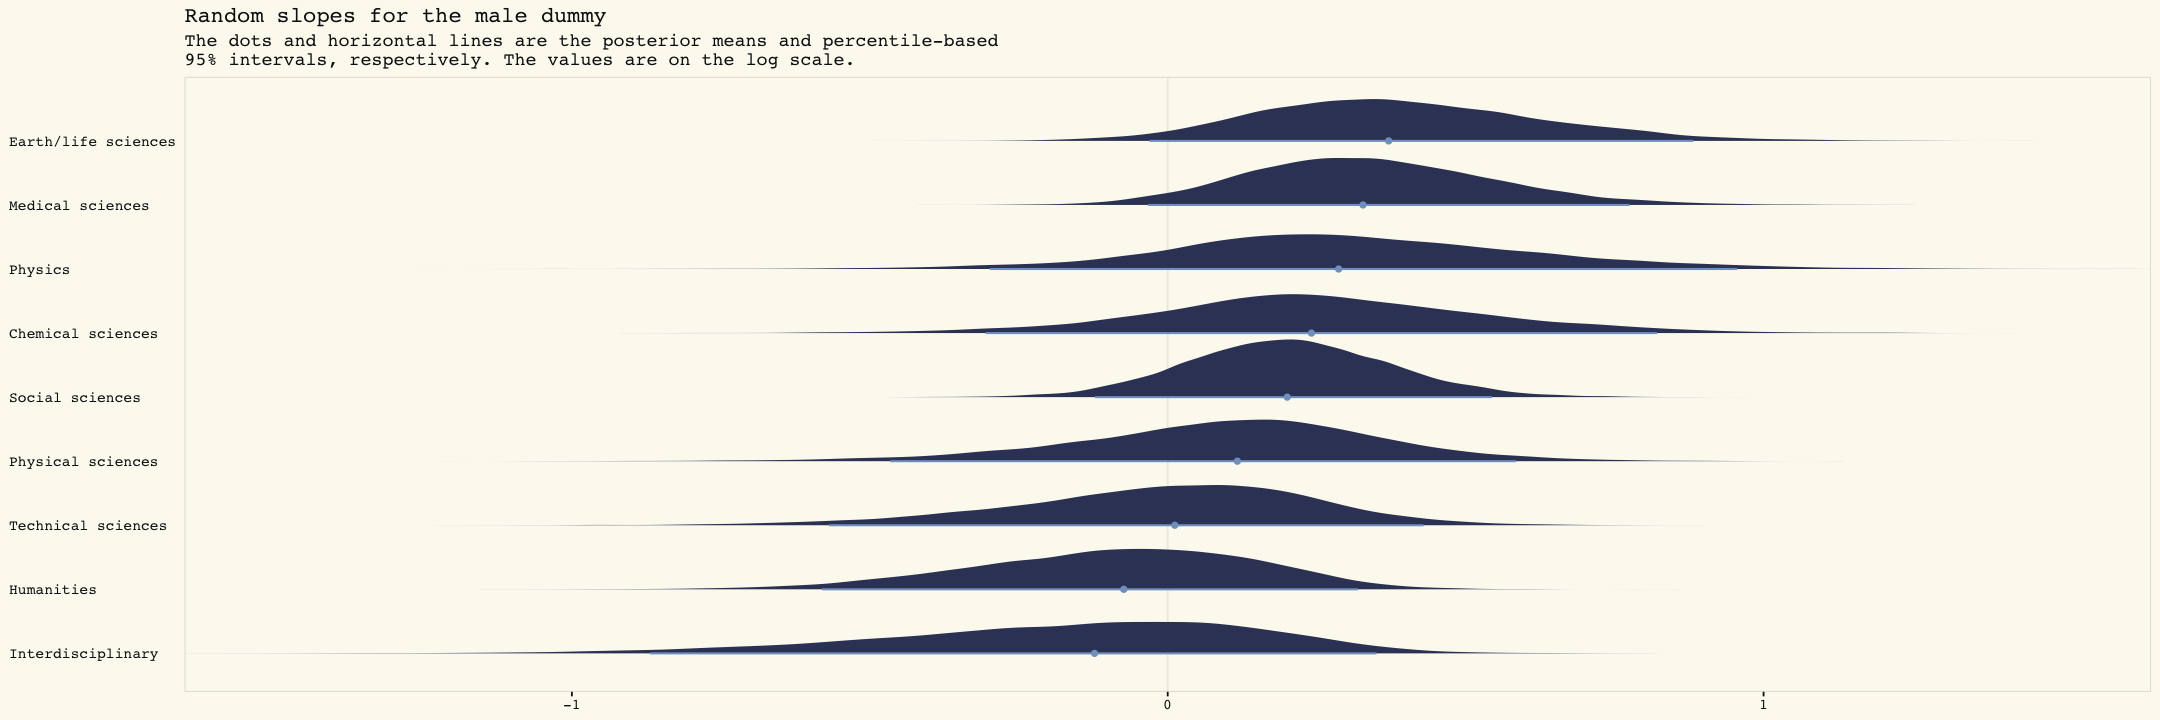

In [84]:
options(repr.plot.width=18, repr.plot.height=6)

# 查看性别的随机斜率
b13.bonus_2 %>% 
  spread_draws(b_male, r_discipline[discipline,term]) %>% 
  filter(term == "male") %>% 
  ungroup() %>% 
  mutate(effect     = b_male + r_discipline,
         discipline = str_replace(discipline, "[.]", " ")) %>% 
  
  ggplot(aes(x = effect, y = reorder(discipline, effect))) +
  geom_vline(xintercept = 0, color = "#E8DCCF", alpha = 1/2) +
  geom_halfeyeh(.width = .95, size = .9, scale = .9,
                color = "#80A0C7", fill = "#394165") +
  labs(title    = "Random slopes for the male dummy",
       subtitle = "The dots and horizontal lines are the posterior means and percentile-based\n95% intervals, respectively. The values are on the log scale.",
       x        = NULL, y = NULL) +
  coord_cartesian(xlim = c(-1.5, 1.5)) +
  theme_pearl_earring +
  theme(axis.ticks.y = element_blank(),
        axis.text.y  = element_text(hjust = 0))

In [85]:
tidy(b13.bonus_2) %>%
  filter(str_detect(term , "b_")) %>%
  mutate_if(is.numeric, round, digits = 2)

term        estimate std.error lower upper
1 b_Intercept -1.63    0.15      -1.85 -1.38
2 b_male       0.15    0.17      -0.14  0.42

全模型单侧贝叶斯检验，性别偏见的估计值很小，并且与零假设相符

In [89]:
posterior_samples(b13.bonus_2) %>%
  summarise(one_sided_Bayesian_p_value = mean(b_male <= 0))

one_sided_Bayesian_p_value
1 0.179625

In [87]:
sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS Catalina 10.15.4

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/3.6/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.6/Resources/lib/libRlapack.dylib

locale:
[1] zh_CN.UTF-8/zh_CN.UTF-8/zh_CN.UTF-8/C/zh_CN.UTF-8/zh_CN.UTF-8

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] broom_0.5.5          ggrepel_0.8.2        brms_2.12.0         
 [4] tidybayes_2.0.3      Rcpp_1.0.4.6         dagitty_0.2-2       
 [7] rstan_2.19.3         StanHeaders_2.21.0-1 dutchmasters_0.1.0  
[10] forcats_0.5.0        stringr_1.4.0        dplyr_0.8.5         
[13] purrr_0.3.4          readr_1.3.1          tidyr_1.0.2         
[16] tibble_3.0.0         ggplot2_3.3.0        tidyverse_1.3.0     

loaded via a namespace (and not attached):
  [1] colorspace_1.4-1     e